# June 29th, 2021

**Motivation**: Visualize cortical 2d projections, combine data in various ways + hierarchical results <br>


In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')

# GitHub
sys.path.insert(0, pjoin(git_dir, 'Ca-fMRI'))
from register.atlas import load_allen, load_bg_atlas
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from utils.plotting import *
from utils.render import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Load & prepare

### Mice

In [2]:
start = time()
mice = Mice(Config(1024))
end = time()

_ = convert_time(end - start)

00 - 00:00:30  (dd - hh:mm:ss)

### parcellation

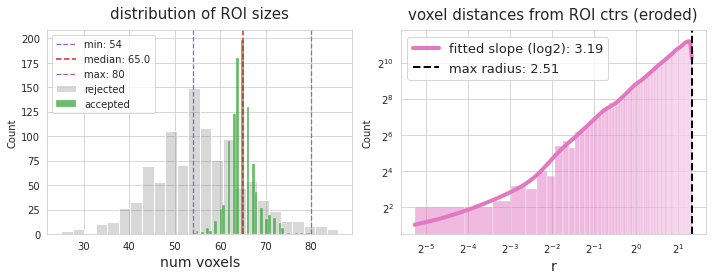

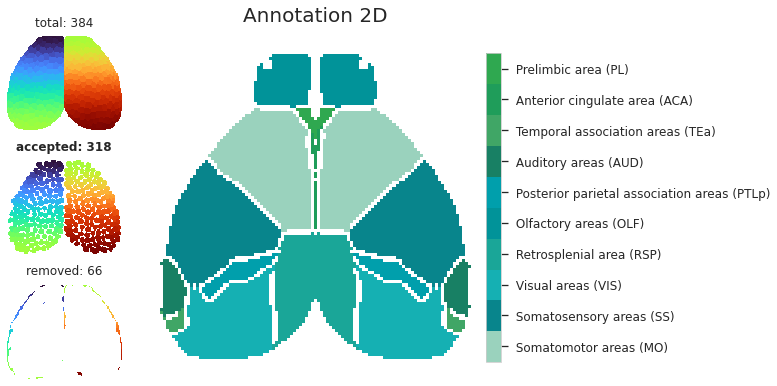

In [3]:
_ = mice.parcel.show()
_ = mice.parcel.show_2d()

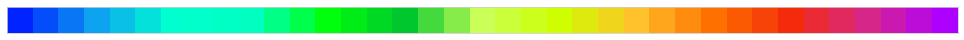

In [4]:
ramp_colors = [
    '#0023ff', '#0ea4f1', '#00ffcf', '#00ffc1',
    '#00ff0d', '#00c72e', '#caff58',
    '#cfff00', '#ffc22c', '#ff7200',
    '#f42c0b', '#d82789', '#ad00ff',
]
custom_cmap = make_cmap(
    ramp_colors=ramp_colors,
    n_colors=mice.parcel.results['n_cortical_regions'],
    name='custom',
)

In [5]:
_ = parcel2html(
    masks=mice.parcel.results['eroded_masks'],
    save_dir=extras_dir,
    cmap=custom_cmap,
)

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/parcel-1024_cmap-custom.html

In [6]:
def show_2d(self, include: List[str] = None, cmap=None, figsize=(10, 7)):
    if include is None:
        include = self.results2d['acro2idx']
    else:
        include = [x for x in self.results2d['acro2idx'] if x in include]
    cmap = cmap if cmap else self.results2d['cmap']

    fig, ax = create_figure(1, 1, figsize=figsize)
    vmin = min(self.results2d['acro2idx'].values()) - 0.5
    vmax = max(self.results2d['acro2idx'].values()) + 0.5
    cond = [self.results2d['atlas'] == self.results2d['acro2idx'][acro] for acro in include]
    cond = functools.reduce(np.logical_or, cond)
    cond = np.logical_or(~cond, self.results2d['contour'])

    data2plt = np.ma.masked_where(cond, self.results2d['atlas'])
    im = ax.imshow(data2plt, cmap=cmap, vmin=vmin, vmax=vmax)

    ticks = [x for x in self.results2d['acro2idx'].values()]
    tick_labels = [
        f" {name} ({acro})" if acro in include else ''
        for acro, name in zip(self.results2d['acro2idx'], self.results2d['name2idx'])
    ]
    cbar = fig.colorbar(im, ticks=ticks, pad=0.1, shrink=0.8)
    cbar.ax.set_yticklabels(tick_labels)
    cbar.ax.tick_params(labelsize=13, length=7, width=1.3)

    _ = list(map(lambda x: x.set_visible(False), ax.spines.values()))
    ax.set_xticks([])
    ax.set_yticks([])
    fig.tight_layout()
    plt.show()

    return fig, ax

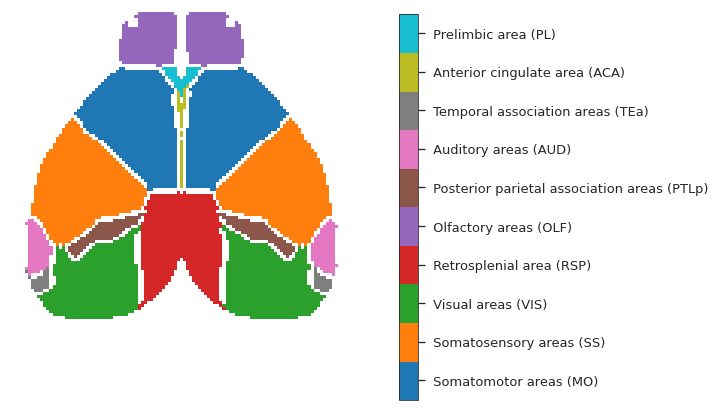

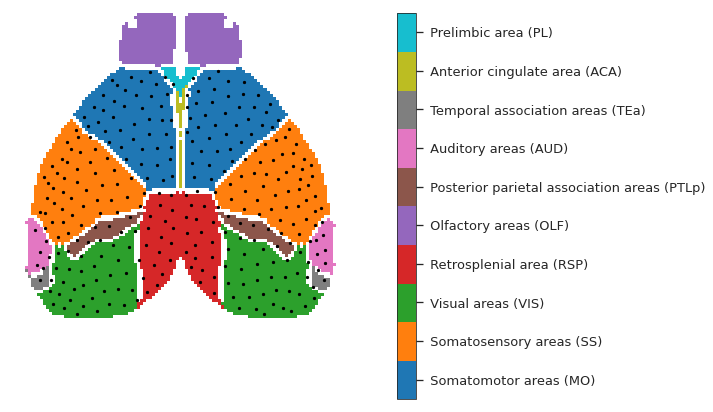

In [7]:
fig, ax = show_2d(mice.parcel, cmap='tab10')
for x in mice.parcel.results2d['centers'].values():
    ax.scatter(x[1], x[0], color='k', s=5)
fig
# ax.invert_yaxis()

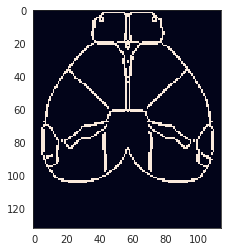

In [8]:
plt.imshow(mice.parcel.results2d['contour']);

### Combine all data

In [8]:
mice.combine_dfs('rest')

In [9]:
len(mice.bold_combined)

44

In [10]:
{k: v.shape for k, v in mice.bold_combined.items()}

{
    'sub-SLC01_ses-1': (2200, 138),
    'sub-SLC01_ses-2': (2200, 138),
    'sub-SLC01_ses-3': (2200, 138),
    'sub-SLC02_ses-1': (2200, 138),
    'sub-SLC02_ses-2': (1650, 138),
    'sub-SLC02_ses-3': (2200, 138),
    'sub-SLC03_ses-1': (1650, 138),
    'sub-SLC03_ses-2': (2200, 138),
    'sub-SLC03_ses-3': (2200, 138),
    'sub-SLC04_ses-1': (2200, 138),
    'sub-SLC04_ses-2': (2200, 138),
    'sub-SLC04_ses-3': (2200, 138),
    'sub-SLC05_ses-1': (1650, 138),
    'sub-SLC05_ses-2': (2200, 138),
    'sub-SLC05_ses-3': (2200, 138),
    'sub-SLC06_ses-1': (2200, 138),
    'sub-SLC06_ses-2': (2200, 138),
    'sub-SLC06_ses-3': (2200, 138),
    'sub-SLC07_ses-1': (2200, 138),
    'sub-SLC07_ses-2': (2200, 138),
    'sub-SLC07_ses-3': (2200, 138),
    'sub-SLC08_ses-1': (1100, 138),
    'sub-SLC08_ses-2': (2200, 138),
    'sub-SLC08_ses-3': (2200, 138),
    'sub-SLC09_ses-1': (2200, 138),
    'sub-SLC09_ses-2': (2200, 138),
    'sub-SLC09_ses-3': (2200, 138),
    'sub-SLC10_ses-1': (2200, 138),
    'sub-SLC10_ses-2': (1650, 138),
    'sub-SLC10_ses-3': (2200, 138),
    'sub-SLC01': (6600, 138),
    'sub-SLC02': (6050, 138),
    'sub-SLC03': (6050, 138),
    'sub-SLC04': (6600, 138),
    'sub-SLC05': (6050, 138),
    'sub-SLC06': (6600, 138),
    'sub-SLC07': (6600, 138),
    'sub-SLC08': (5500, 138),
    'sub-SLC09': (6600, 138),
    'sub-SLC10': (6050, 138),
    'sub-SLC': (62700, 138),
    'ses-1': (19800, 138),
    'ses-2': (20900, 138),
    'ses-3': (22000, 138)
}

In [11]:
tot = 0
for k, v in mice.bold_combined.items():
    size = sys.getsizeof(v) / 1e6
    tot += size
tot

278.89030399999996

In [12]:
tot = 0
for k, v in mice.bold_df_piv.items():
    size = sys.getsizeof(v) / 1e6
    tot += size
tot

124.76966399999972

In [174]:
mice = Mice(Config(128))
mice.combine_dfs('rest')

In [175]:
df = mice.bold_combined['sub-SLC']
node_labels = df.columns.values.tolist()
node_labels = {i: lbl for i, lbl in enumerate(node_labels)}

df.shape, len(node_labels), len(mice.bold_df_piv)

((62700, 138), 138, 204)

## Hierarchical clustering

In [176]:
c_idxs = {
    0: None,
    1: None,
    2: [17, 0],
    3: [17, 8, 12], 
    4: [17, 8, 12, 4],
    5: [17, 8, 12, 4, 0],
    6: [17, 8, 10, 12, 4, 0],
    7: [17, 8, 10, 12, 14, 4, 0],
    8: [17, 8, 10, 12, 14, 4, 6, 0],
    9: [17, 8, 10, 12, 14, 4, 6, 0, 2],
    10: [17, 8, 10, 12, 14, 4, 6, 7, 0, 2],
    11: [17, 8, 10, 12, 14, 4, 5, 6, 7, 0, 2],
    12: [17, 8, 10, 12, 14, 4, 5, 6, 7, 0, 2, 3],
    13: [16, 17, 8, 10, 12, 14, 4, 5, 6, 7, 0, 2, 3],
    14: [16, 17, 8, 10, 11, 12, 14, 4, 5, 6, 7, 0, 2, 3],
    15: [16, 17, 8, 9, 10, 11, 12, 14, 4, 5, 6, 7, 0, 2, 3],
}

In [177]:
start = time()
hier = Hierarchical(df, parcel=mice.parcel, metric='correlation')
hier.fit(range(16))#, c_idxs)
end = time()

_ = convert_time(end - start)

00 - 00:01:00  (dd - hh:mm:ss)

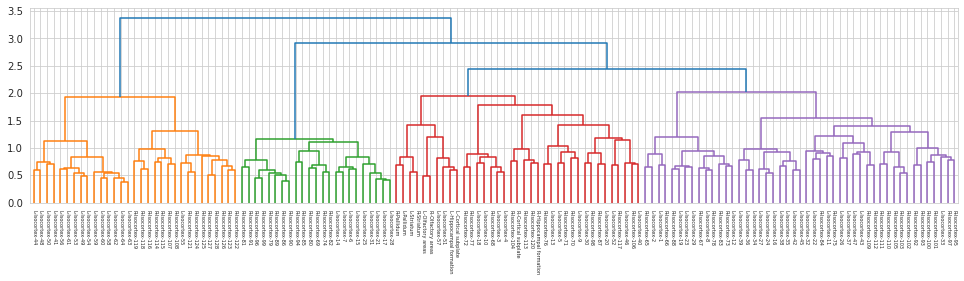

In [178]:
display(hier.results[0]['fig'])

### All clusters

n_clusters = 2

#1f77b4,"['(31)', '(107)']"


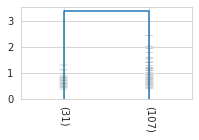

[PROGRESS] 'CORR-REST-128-regions_n-2.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'CORR-REST-128-clusters_n-2.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 3

#1f77b4,"['(31)', '(23)', '(84)']"


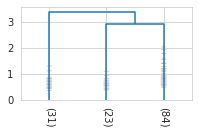

[PROGRESS] 'CORR-REST-128-regions_n-3.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'CORR-REST-128-clusters_n-3.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 4

#1f77b4,"['(31)', '(23)', '(37)', '(47)']"


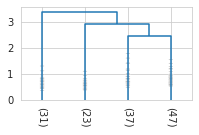

[PROGRESS] 'CORR-REST-128-regions_n-4.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'CORR-REST-128-clusters_n-4.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 5

#1f77b4,"['(31)', '(23)', '(37)']"
#ff7f0e,"['(14)', '(33)']"


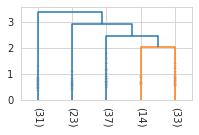

[PROGRESS] 'CORR-REST-128-regions_n-5.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'CORR-REST-128-clusters_n-5.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 6

#1f77b4,"['(31)', '(23)']"
#ff7f0e,"['(10)', '(27)']"
#2ca02c,"['(14)', '(33)']"


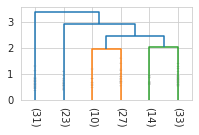

[PROGRESS] 'CORR-REST-128-regions_n-6.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'CORR-REST-128-clusters_n-6.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 7

#1f77b4,['(23)']
#ff7f0e,"['(15)', '(16)']"
#2ca02c,"['(10)', '(27)']"
#d62728,"['(14)', '(33)']"


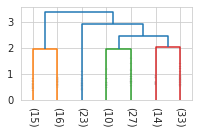

[PROGRESS] 'CORR-REST-128-regions_n-7.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'CORR-REST-128-clusters_n-7.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 8

#1f77b4,['(23)']
#ff7f0e,"['(15)', '(16)']"
#2ca02c,"['(10)', '(7)', '(20)']"
#d62728,"['(14)', '(33)']"


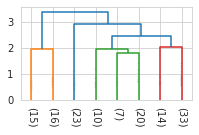

[PROGRESS] 'CORR-REST-128-regions_n-8.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'CORR-REST-128-clusters_n-8.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 9

#1f77b4,['(23)']
#ff7f0e,"['(15)', '(16)']"
#2ca02c,"['(10)', '(7)', '(5)', '(15)']"
#d62728,"['(33)', '(14)']"


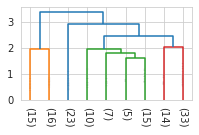

[PROGRESS] 'CORR-REST-128-regions_n-9.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'CORR-REST-128-clusters_n-9.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 10

#1f77b4,['(23)']
#ff7f0e,"['(15)', '(16)']"
#2ca02c,"['(10)', '(7)', '(5)', '(15)']"
#d62728,"['(10)', '(23)', '(14)']"


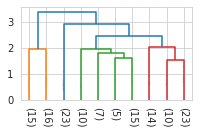

[PROGRESS] 'CORR-REST-128-regions_n-10.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'CORR-REST-128-clusters_n-10.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 11

#1f77b4,['(23)']
#ff7f0e,"['(15)', '(16)']"
#2ca02c,"['(4)', '(6)', '(7)', '(5)', '(15)']"
#d62728,"['(14)', '(10)', '(23)']"


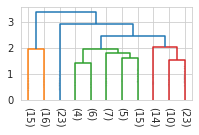

[PROGRESS] 'CORR-REST-128-regions_n-11.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'CORR-REST-128-clusters_n-11.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 12

#1f77b4,['(23)']
#ff7f0e,"['(15)', '(16)']"
#2ca02c,"['(4)', '(6)', '(7)', '(5)', '(6)', '(9)']"
#d62728,"['(14)', '(10)', '(23)']"


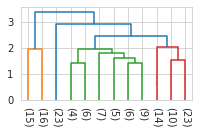

[PROGRESS] 'CORR-REST-128-regions_n-12.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'CORR-REST-128-clusters_n-12.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 13

#1f77b4,['(23)']
#ff7f0e,"['(15)', '(16)']"
#2ca02c,"['(4)', '(6)', '(7)', '(5)', '(6)', '(9)']"
#d62728,"['(14)', '(10)', '(11)', '(12)']"


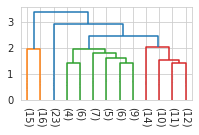

[PROGRESS] 'CORR-REST-128-regions_n-13.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'CORR-REST-128-clusters_n-13.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 14

#1f77b4,['(23)']
#ff7f0e,"['(15)', '(7)', '(9)']"
#2ca02c,"['(4)', '(6)', '(7)', '(5)', '(6)', '(9)']"
#d62728,"['(14)', '(10)', '(11)', '(12)']"


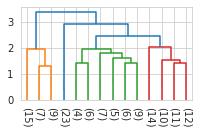

[PROGRESS] 'CORR-REST-128-regions_n-14.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'CORR-REST-128-clusters_n-14.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

n_clusters = 15

#1f77b4,['(23)']
#ff7f0e,"['(15)', '(7)', '(9)']"
#2ca02c,"['(4)', '(6)', '(7)', '(5)', '(6)', '(9)']"
#d62728,"['(14)', '(10)', '(11)', '(5)', '(7)']"


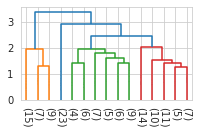

[PROGRESS] 'CORR-REST-128-regions_n-15.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

[PROGRESS] 'CORR-REST-128-clusters_n-15.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/_extras

In [179]:
for n, result_dict in hier.results.items():
    if n < 2:
        continue
    print(f"n_clusters = {n}")
    display(result_dict['cluster_classes'])
    ax = result_dict['ax']
    ax.tick_params(axis='x', labelsize=10)
    f = result_dict['fig']
    f.set_size_inches(2.5, 1.5)
    display(f)
    display(sns.color_palette(result_dict['cluster_colors'].values()))

    # export results
    _ = result_dict['cluster'].export(extras_dir, f"CORR-REST-{hier.parcel['n_cortical_regions']}")
    print('\n\n')

#1f77b4,['(23)']
#ff7f0e,"['(15)', '(7)', '(9)']"
#2ca02c,"['(4)', '(6)', '(7)', '(5)', '(6)', '(9)']"
#d62728,"['(14)', '(10)', '(11)', '(5)', '(7)']"


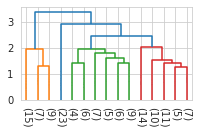

In [180]:
display(hier.results[15]['cluster_classes'])
ax = hier.results[15]['ax']
ax.tick_params(axis='x', labelsize=10)
f = hier.results[15]['fig']
f.set_size_inches(2.5, 1.5)
display(f)
display(sns.color_palette(hier.results[15]['cluster_colors'].values()))

In [183]:
hier.results[5]['cluster']

STR C_2 100% PAL C_2 100% OLF C_2 100% CTXsp C_2 100% HPF C_2 100% VIS C_1 100% TEa C_2 42% C_1 39% C_4 18% PERI C_2 84% C_4 10% C_1 7% ECT C_2 81% C_4 11% C_1 8% RSP C_1 57% C_2 42% C_4 2% AUD C_1 48% C_4 46% C_2 6% PTLp C_1 100% VISC C_4 56% C_5 24% C_2 21% SS C_4 55% C_5 35% C_1 9% SSp C_4 58% C_5 31% C_1 11% SSp-bfd C_4 75% C_1 25% SSp-ll C_4 97% C_1 2% SSp-m C_5 93% C_4 7% SSp-n C_4 65% C_5 35% SSp-tr C_1 74% C_4 26% SSp-ul C_4 86% C_5 13% C_1 1% SSp-un C_4 78% C_5 17% C_1 5% SSs C_4 50% C_5 46% C_1 4% GU C_5 69% C_4 23% C_2 8% ACA C_2 71% C_3 27% C_4 2% AI C_2 66% C_5 18% C_4 16% MO C_3 36% C_5 31% C_4 26% C_2 7% MOp C_5 49% C_4 36% C_3 14% C_2 1% MOs C_3 56% C_4 17% C_5 16% C_2 12% ILA C_2 100% PL C_3 48% C_2 46% C_4 6% ORB C_2 74% C_3 23% C_4 3% FRP C_3 72% C_2 19% C_4 9%

### Embed table

In [25]:
n_clusters = 5
file = f"../../_extras/full-{hier.parcel['n_cortical_regions']}-regions_n-{n_clusters}.html"
IFrame(file, width=1000, height=550)

## Render

In [182]:
for n, d in hier.results.items():
    _ = cluster2html(
        cluster=d['cluster'],
        save_name='CORR-REST',
        n_cortex_regions=hier.parcel['n_cortical_regions'],
        save_dir=extras_dir,
    )

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-4.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-1.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-2.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-3.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-4.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-5.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-6.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-7.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-8.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-9.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-10.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-11.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-12.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-13.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-14.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/CORR-REST_render-128_n-15.html

### Embed 3d

In [12]:
n = 5  
file = f"../../_extras/CORR-REST_render-{mice.cfg.n_cortex_regions}_n-{n}.html"
IFrame(file, width=1000, height=700)

## Dice

In [27]:
def dice_score(m1, m2):
    return 2.0 * np.logical_and(m1, m2).sum() / (np.sum(m1) + np.sum(m2))

def overlap_score(m1, m2):
    return np.logical_and(m1, m2).sum() / min(np.sum(m1), np.sum(m2))

In [28]:
from scipy.spatial import distance as sp_dist

In [31]:
sp_dist.jaccard, sp_dist.hamming, sp_dist.chebyshev

(
    <function jaccard at 0x7fb7be038160>,
    <function hamming at 0x7fb7be0380d0>,
    <function chebyshev at 0x7fb7be038430>
)

In [32]:
mice.combine_dfs('rest')

In [7]:
# df = mice.bold_combined['sub-SLC']
# node_labels = df.columns.values.tolist()
# node_labels = {i: lbl for i, lbl in enumerate(node_labels)}

metric = 'correlation'
n_clusters = range(17)

start = time()
hier = Hierarchical(
    df=mice.bold_combined['sub-SLC'],
    parcel=mice.parcel,
    metric=metric,
).fit(n_clusters)
end = time()
_ = convert_time(end - start)

start = time()
hier1 = Hierarchical(
    df=mice.bold_combined['ses-1'],
    parcel=mice.parcel,
    metric=metric,
).fit(n_clusters)
end = time()
_ = convert_time(end - start)

start = time()
hier2 = Hierarchical(
    df=mice.bold_combined['ses-2'],
    parcel=mice.parcel,
    metric=metric,
).fit(n_clusters)
end = time()
_ = convert_time(end - start)

start = time()
hier3 = Hierarchical(
    df=mice.bold_combined['ses-3'],
    parcel=mice.parcel,
    metric=metric,
).fit(n_clusters)
end = time()
_ = convert_time(end - start)

00 - 00:01:05  (dd - hh:mm:ss)

00 - 00:01:01  (dd - hh:mm:ss)

00 - 00:01:00  (dd - hh:mm:ss)

00 - 00:01:01  (dd - hh:mm:ss)

In [9]:
from register.atlas import project_masks_2d

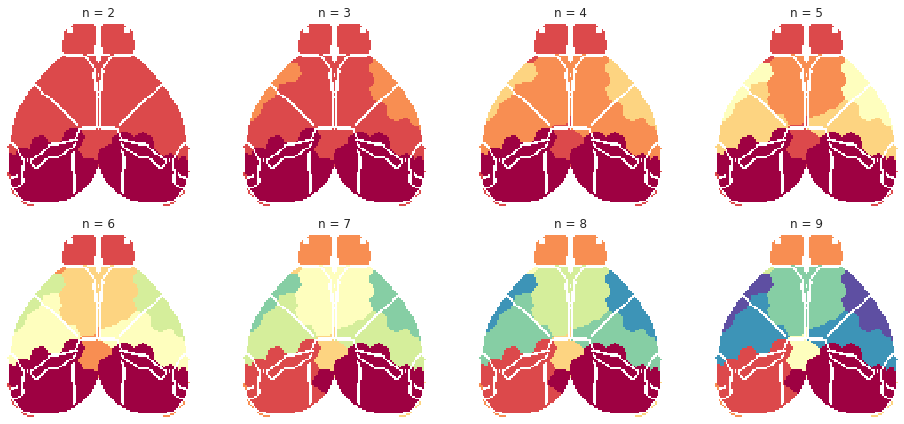

In [14]:
n_clusters = range(2, 10)

nrows = 2
ncols = int(np.ceil(len(n_clusters) / nrows))
fig, axes = create_figure(nrows, ncols, figsize=(13.5, 6))
# _ = mice.parcel.get_annot_fig(fig, axes[-1], ctick_labelsize=7, shrink=0.5)

for ax_i, n in enumerate(n_clusters):
    i, j = ax_i//ncols, ax_i%ncols
    cluster = hier.results[n]['cluster']
    cluster_masks = {i: cluster.x == i for i in cluster.idxs}
    coord2c = project_masks_2d(cluster_masks, mice.allen)[0]

    npix_x, npix_y, npix_z = mice.allen['template_info']['sizes']
    clusters2d = np.zeros((npix_x, npix_z))
    for pix, c in coord2c.items():
        clusters2d[pix] = c
    clusters2d = clusters2d.astype('uint8')

    _contour, _x = filter_boundaries(
        x_list=[mice.parcel.results2d['contour'], clusters2d],
        mask=clusters2d.astype(bool),
    )
    cond = np.logical_or(_contour, _x == 0)
    data2plt = np.ma.masked_where(cond, _x)
    axes[i, j].imshow(data2plt, cmap='Spectral', vmin=1, vmax=max(n_clusters))
    axes[i, j].set_title(f"n = {len(cluster.idxs)}")
    remove_ticks(axes[i, j])

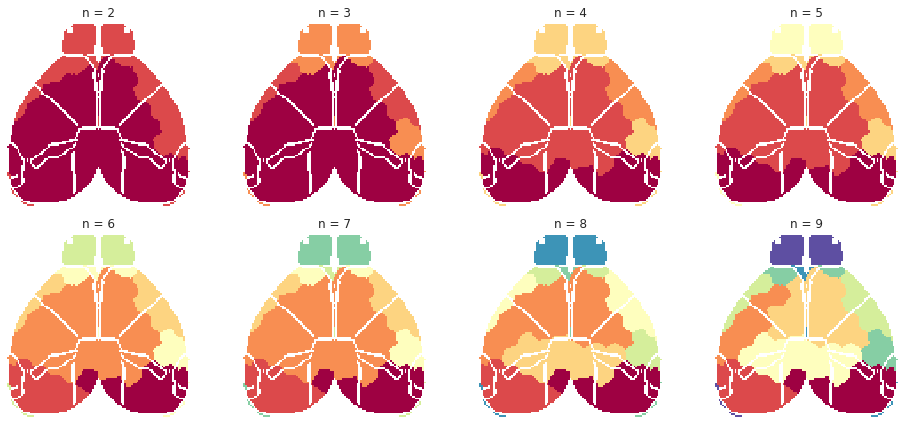

In [18]:
n_clusters = range(2, 10)

nrows = 2
ncols = int(np.ceil(len(n_clusters) / nrows))
fig, axes = create_figure(nrows, ncols, figsize=(13.5, 6))
# _ = mice.parcel.get_annot_fig(fig, axes[-1], ctick_labelsize=7, shrink=0.5)

for ax_i, n in enumerate(n_clusters):
    i, j = ax_i//ncols, ax_i%ncols
    cluster = hier3.results[n]['cluster']
    cluster_masks = {i: cluster.x == i for i in cluster.idxs}
    coord2c = project_masks_2d(cluster_masks, mice.allen)[0]

    npix_x, npix_y, npix_z = mice.allen['template_info']['sizes']
    clusters2d = np.zeros((npix_x, npix_z))
    for pix, c in coord2c.items():
        clusters2d[pix] = c
    clusters2d = clusters2d.astype('uint8')

    _contour, _x = filter_boundaries(
        x_list=[mice.parcel.results2d['contour'], clusters2d],
        mask=clusters2d.astype(bool),
    )
    cond = np.logical_or(_contour, _x == 0)
    data2plt = np.ma.masked_where(cond, _x)
    axes[i, j].imshow(data2plt, cmap='Spectral', vmin=1, vmax=max(n_clusters))
    axes[i, j].set_title(f"n = {len(cluster.idxs)}")
    remove_ticks(axes[i, j])

In [4]:
mice.combine_dfs('rest')

In [5]:
from register.atlas import project_masks_2d

  0%|          | 0/44 [00:00<?, ?it/s]

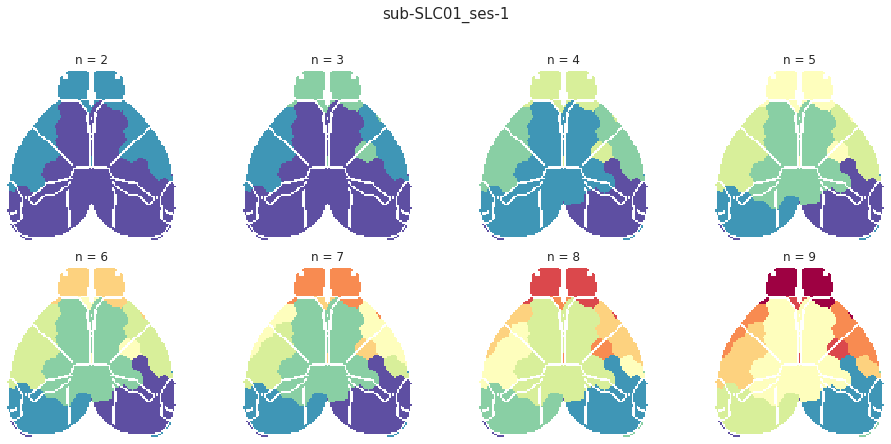

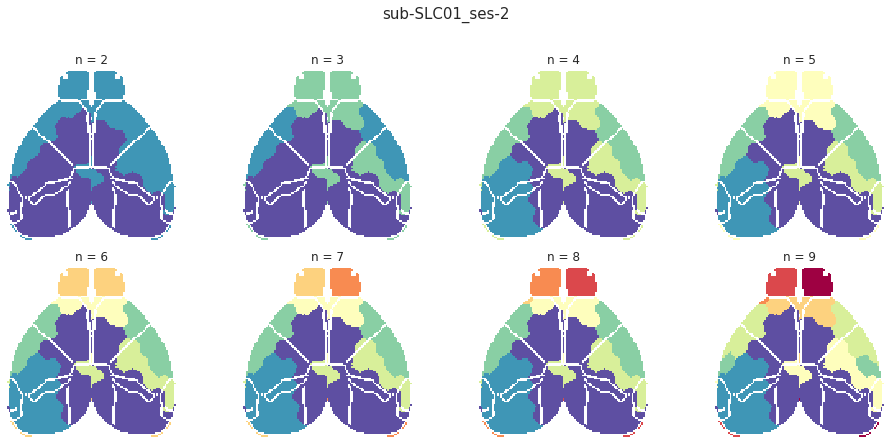

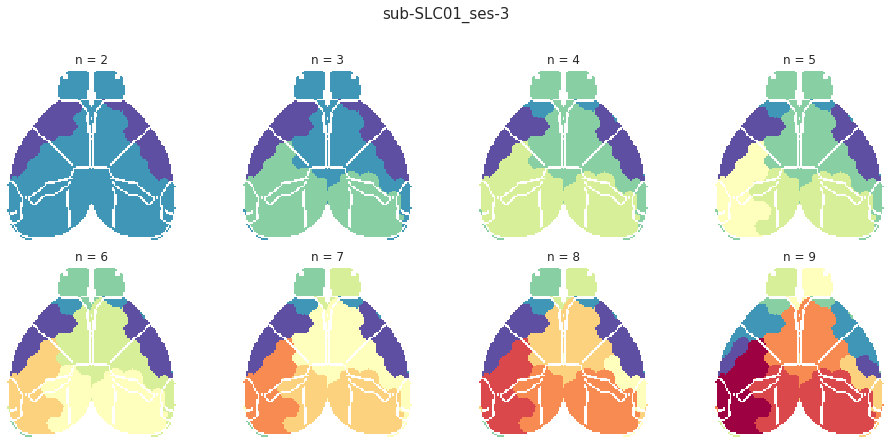

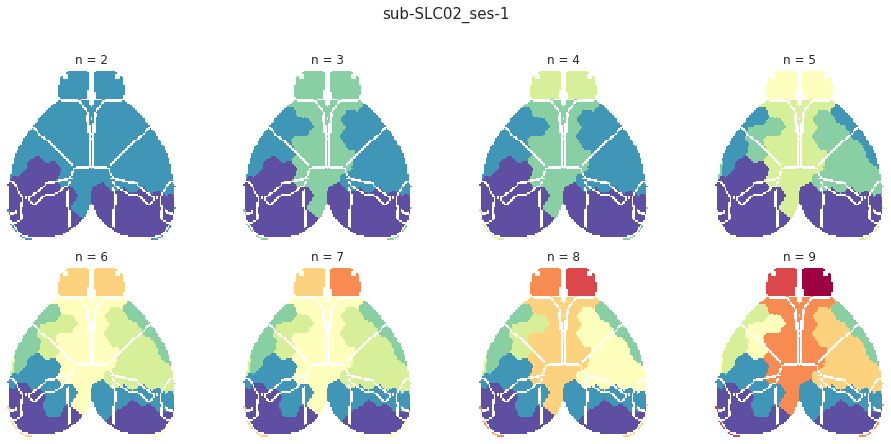

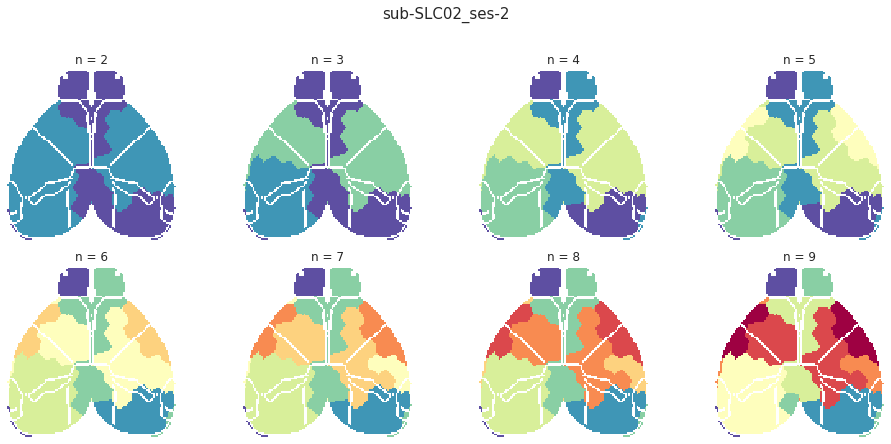

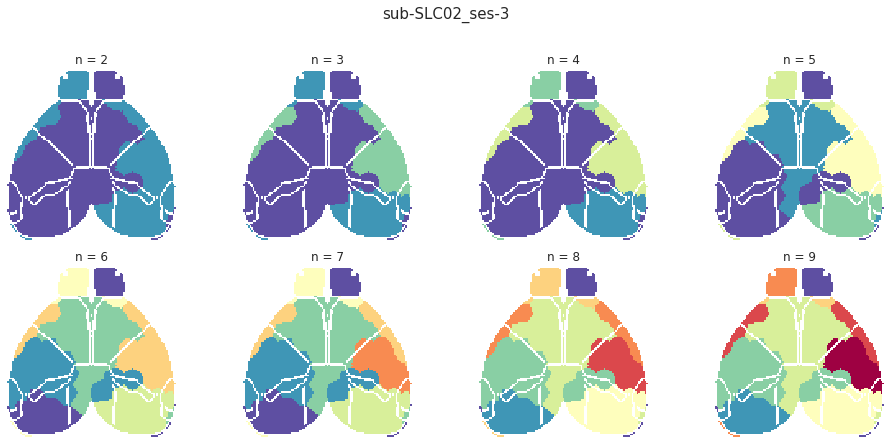

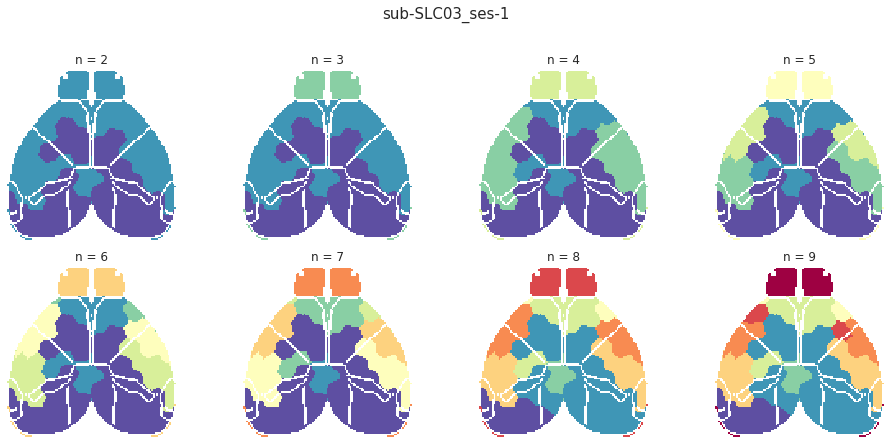

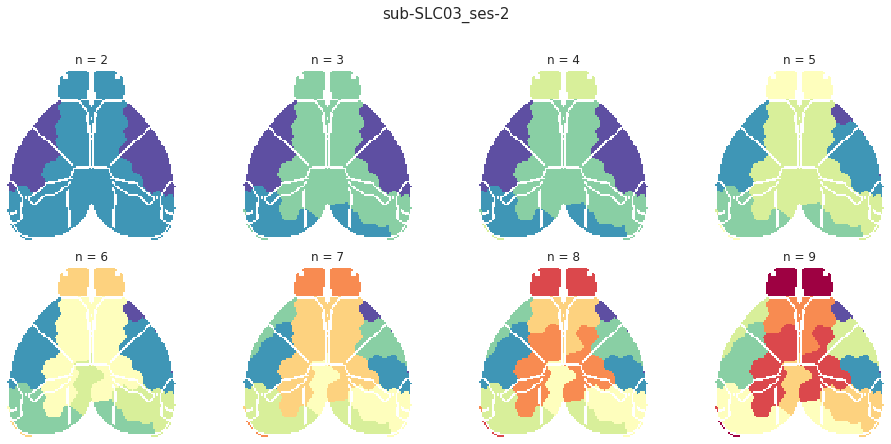

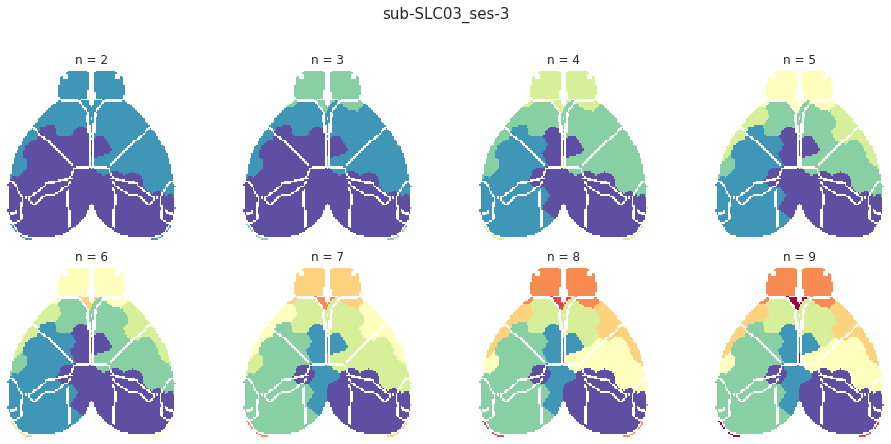

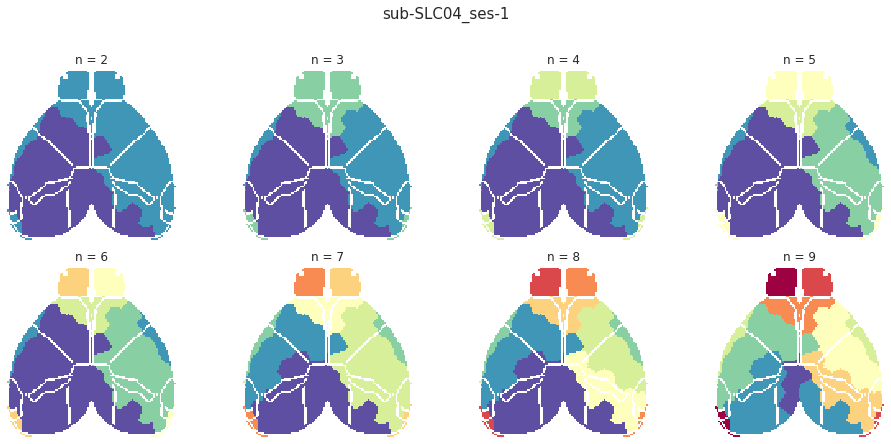

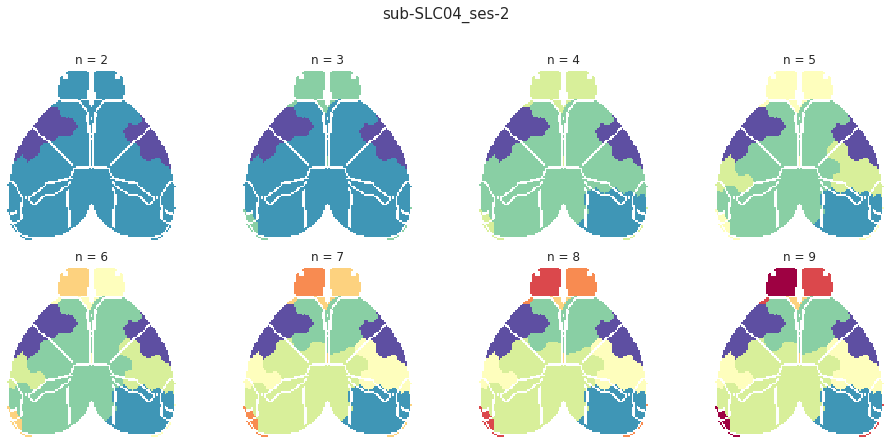

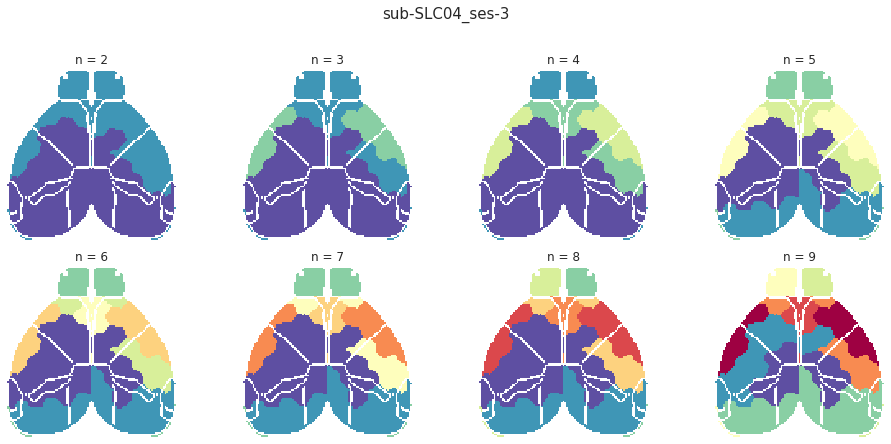

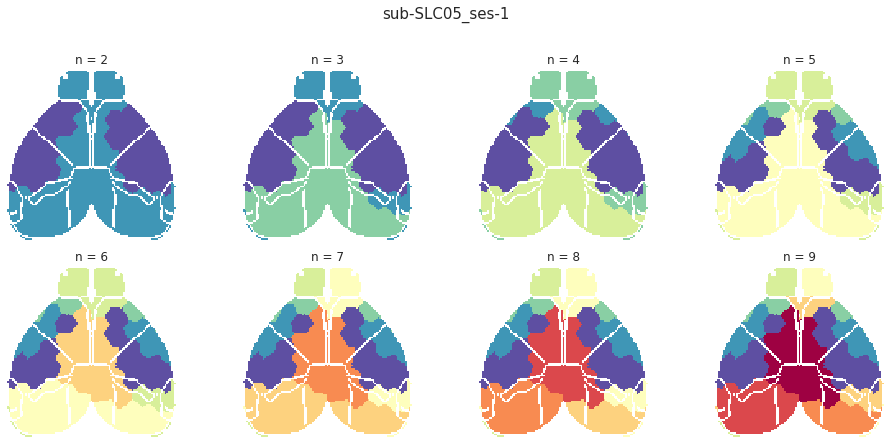

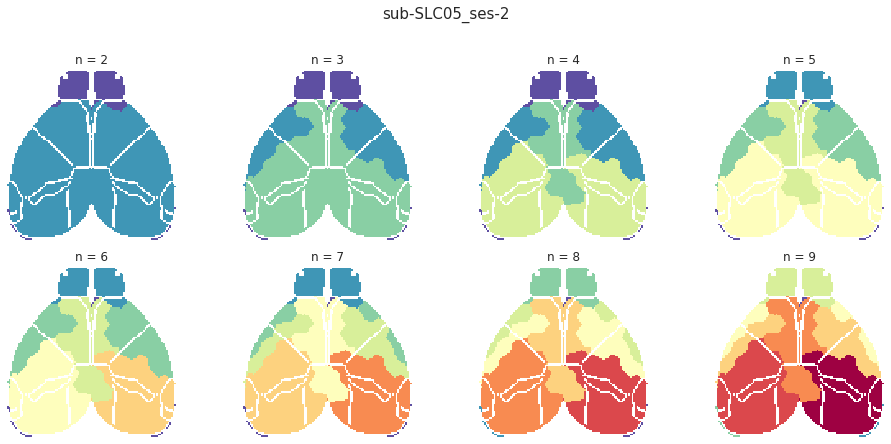

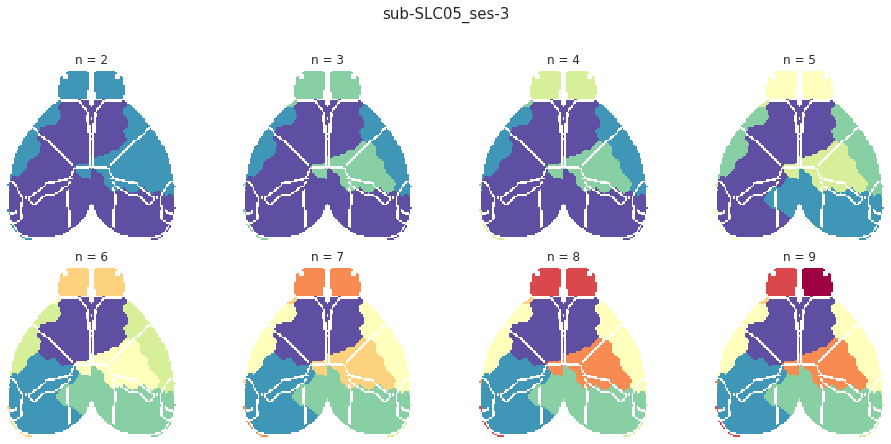

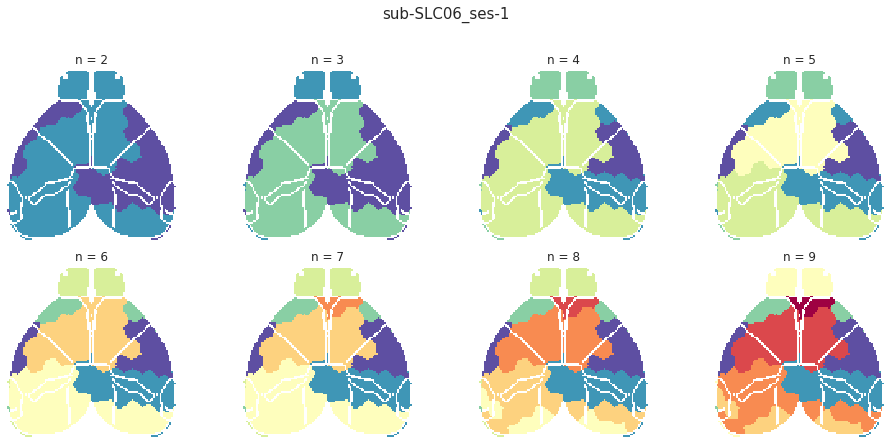

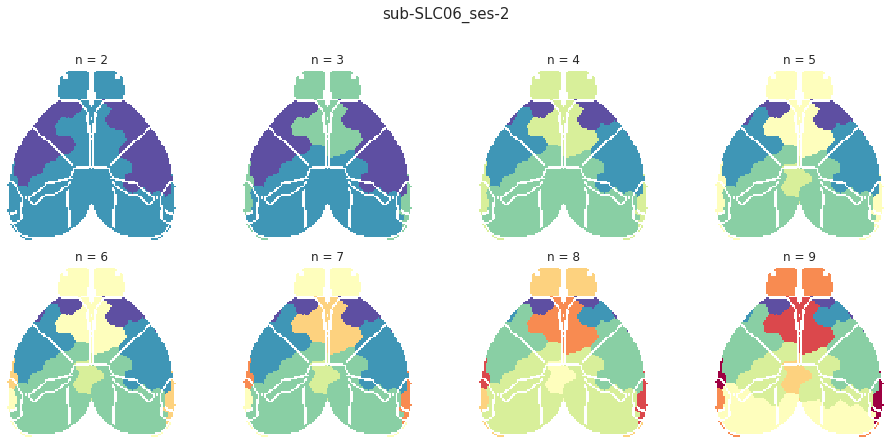

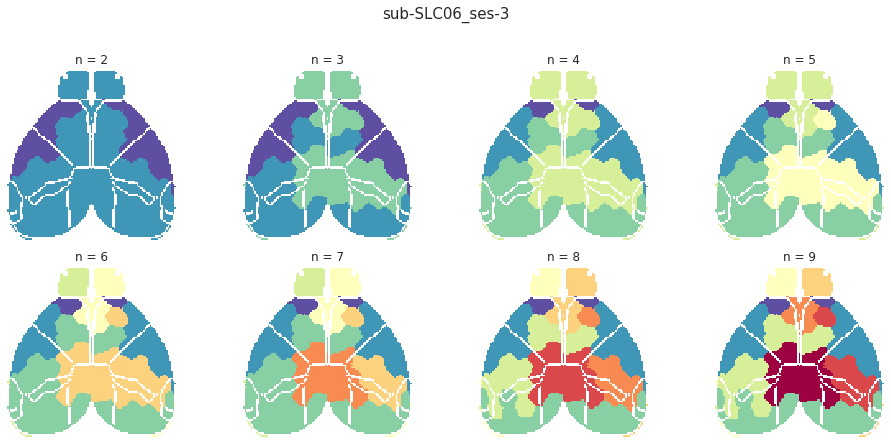

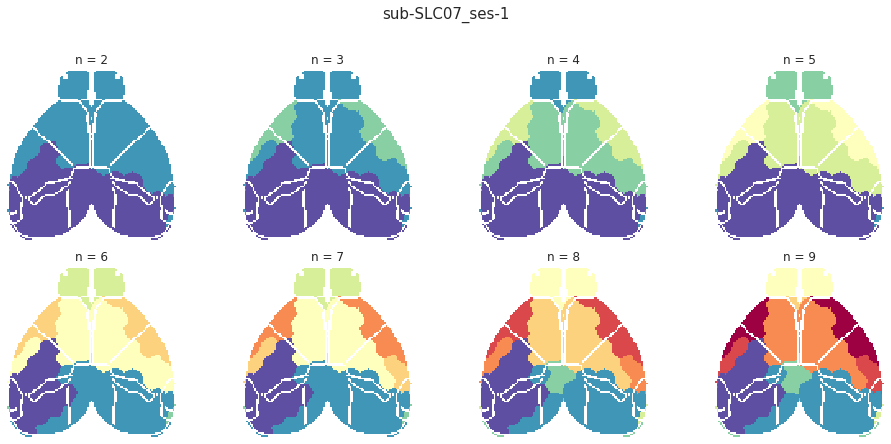

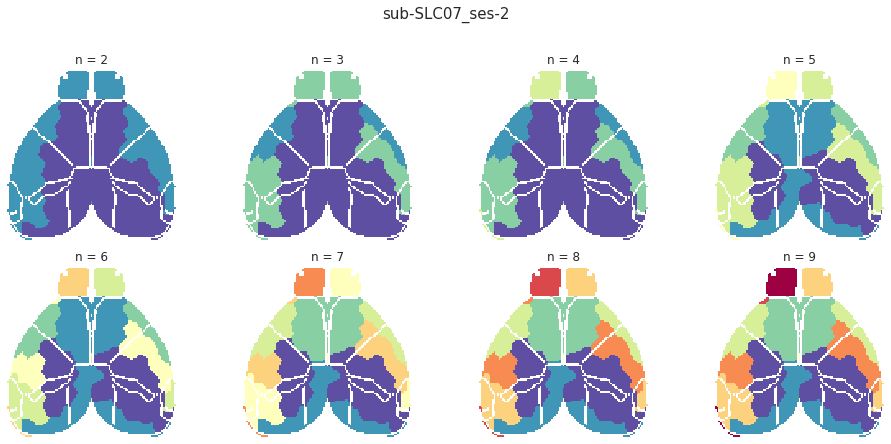

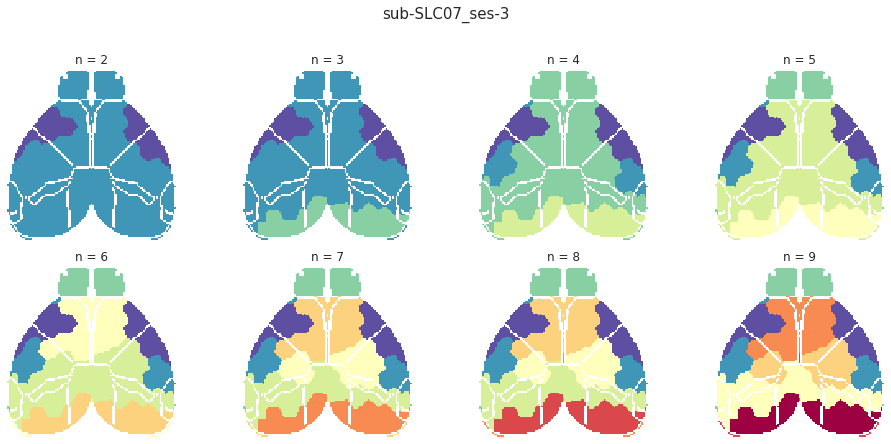

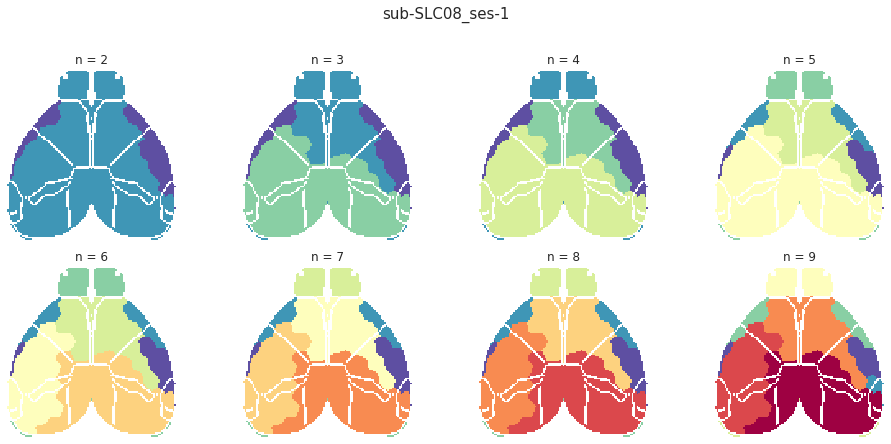

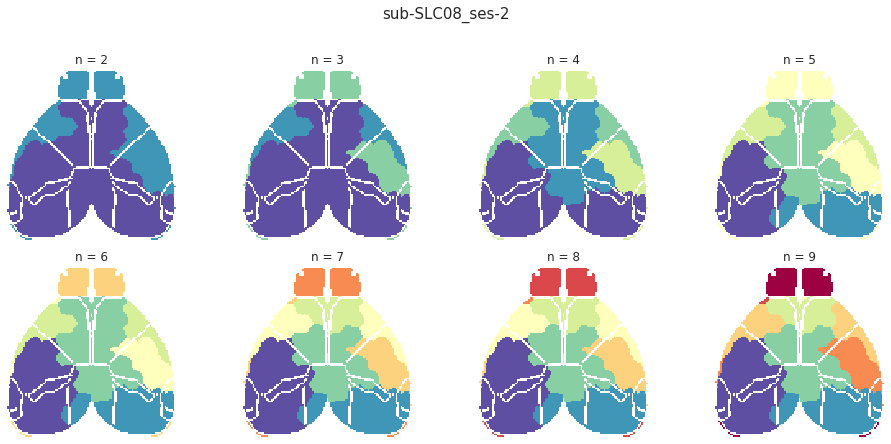

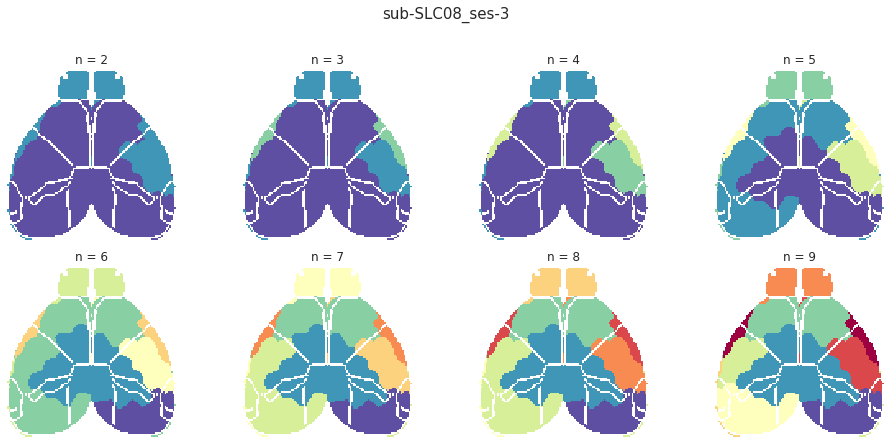

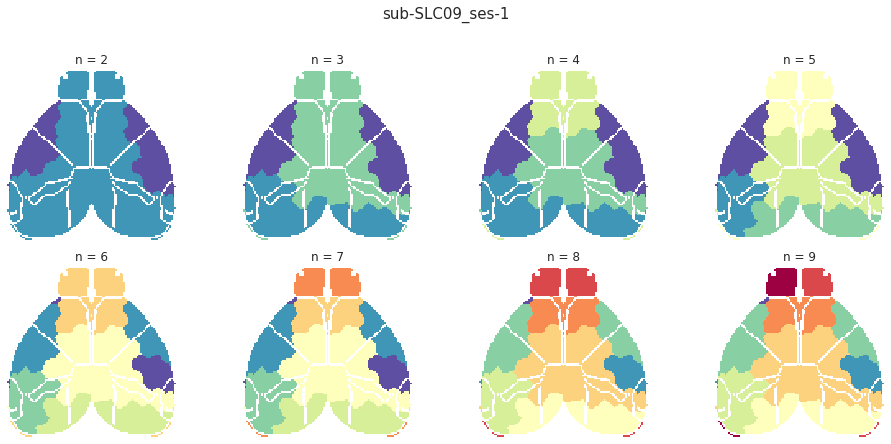

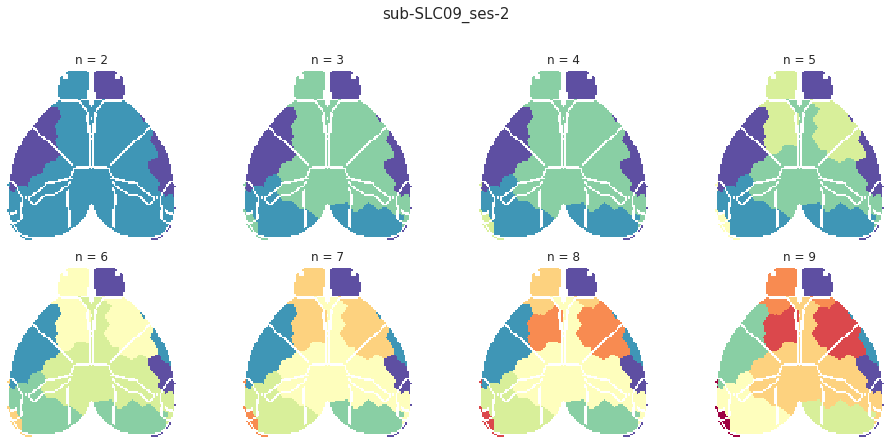

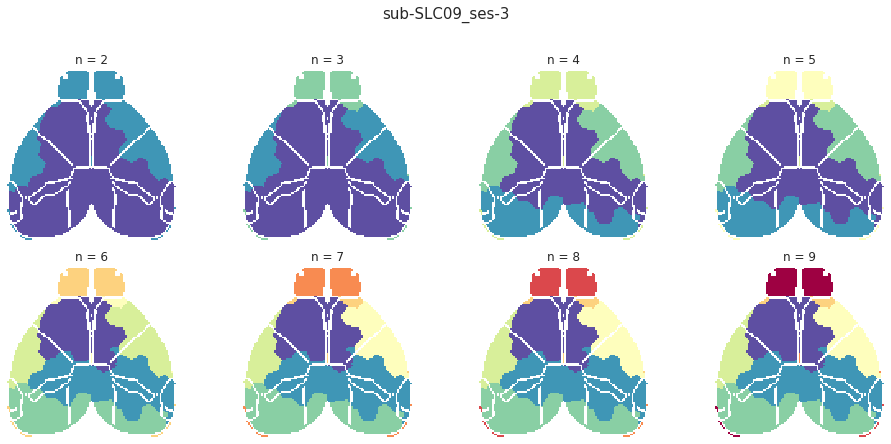

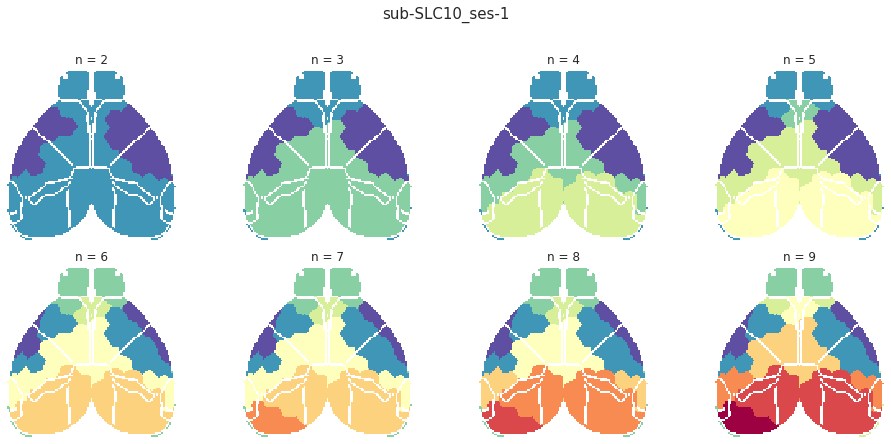

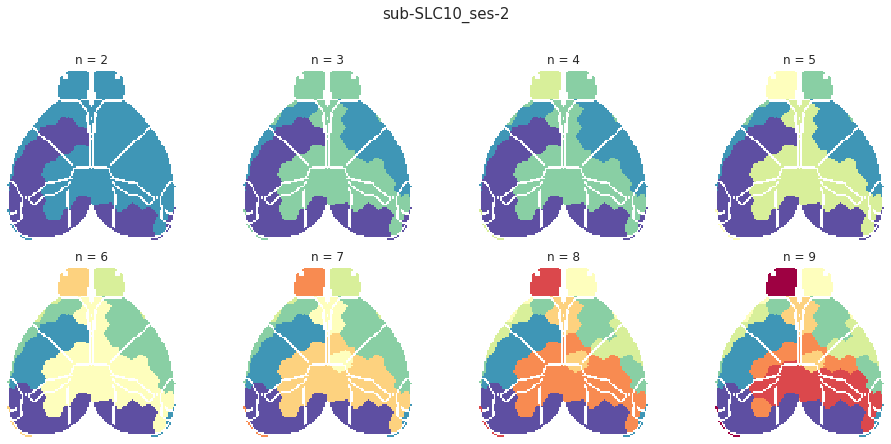

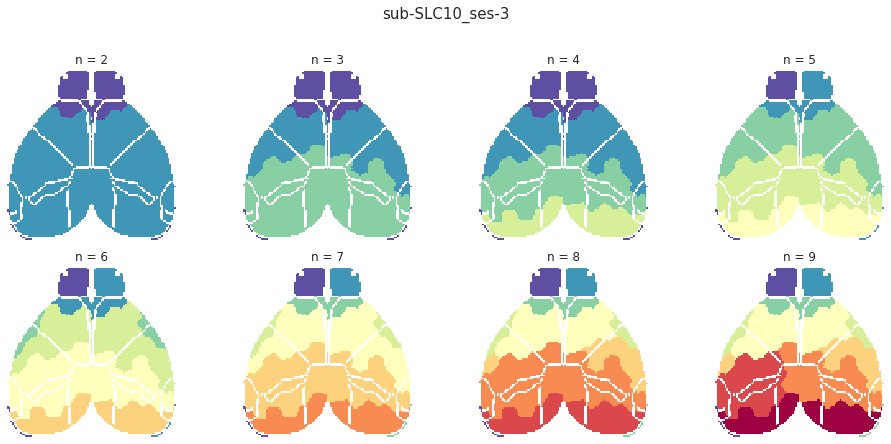

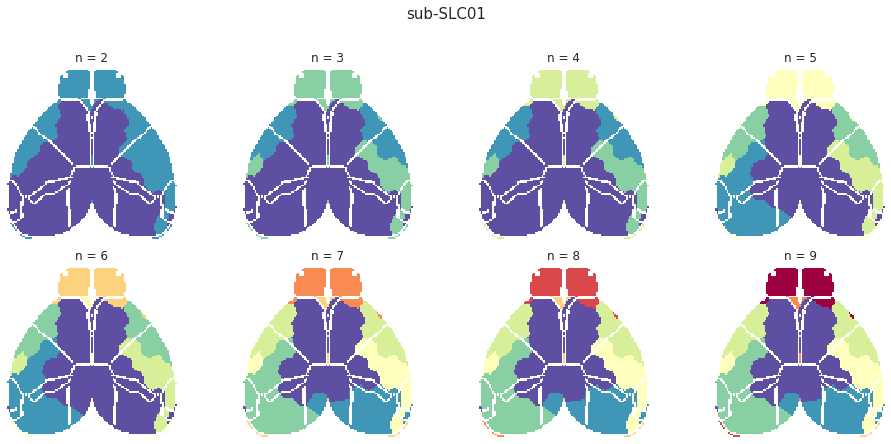

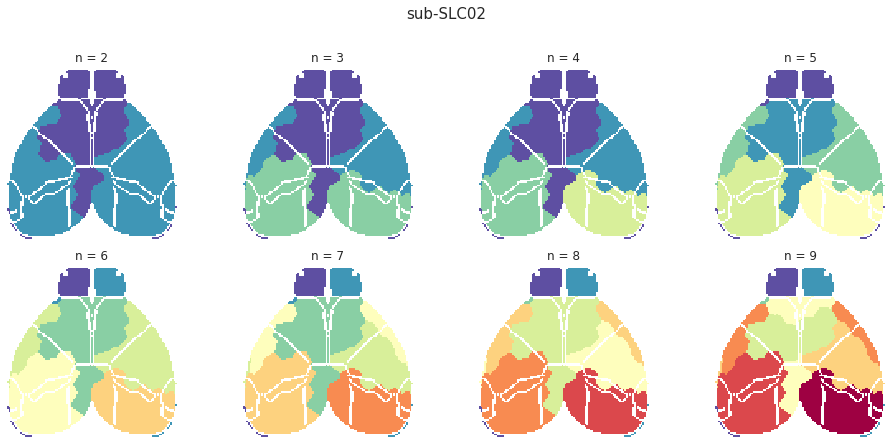

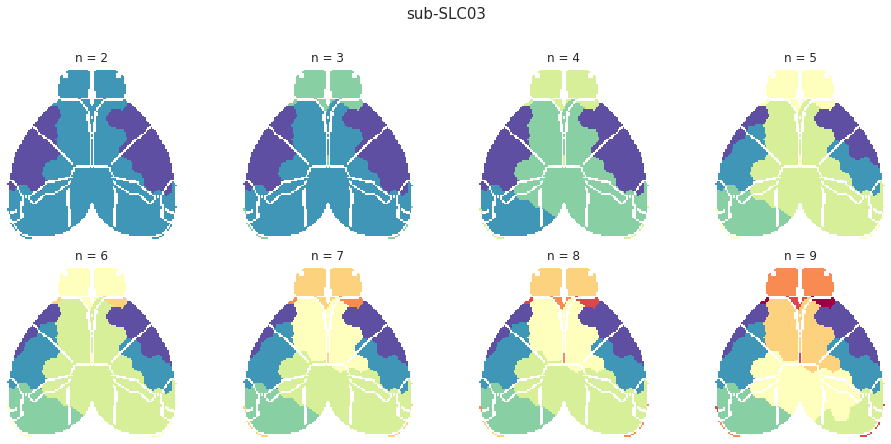

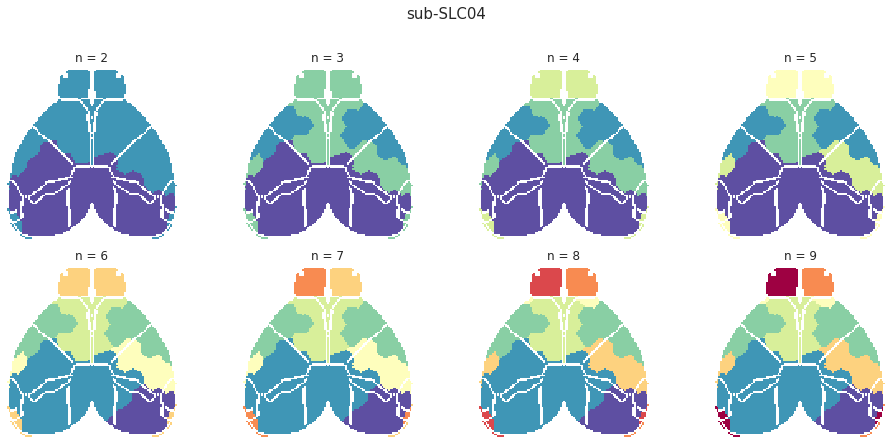

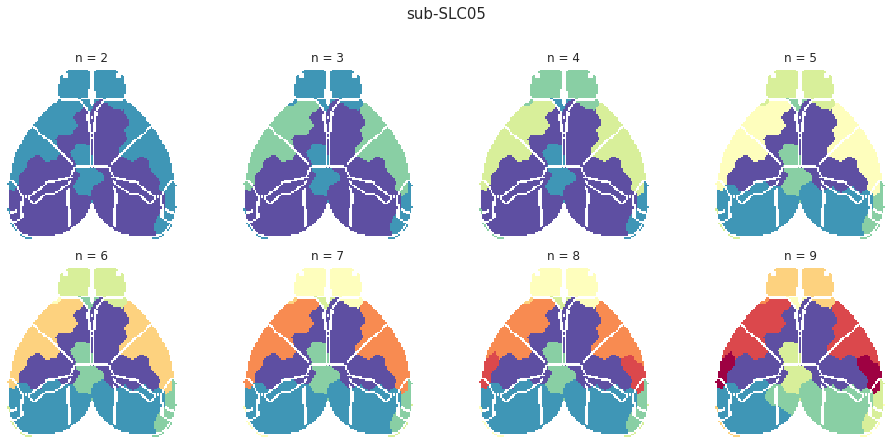

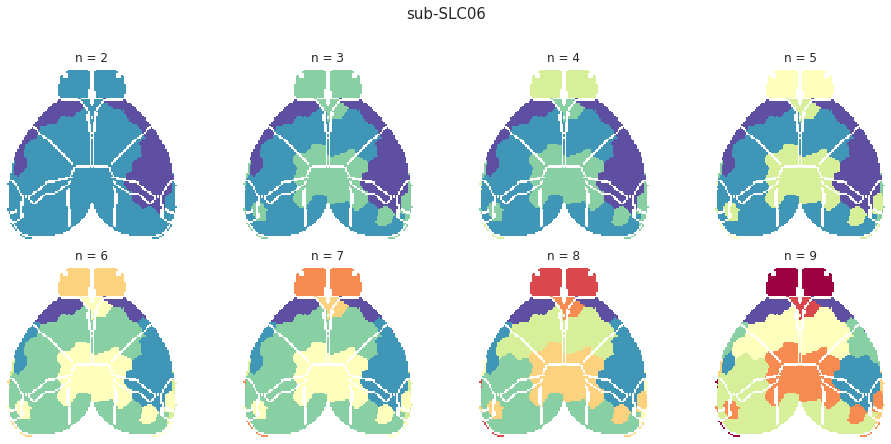

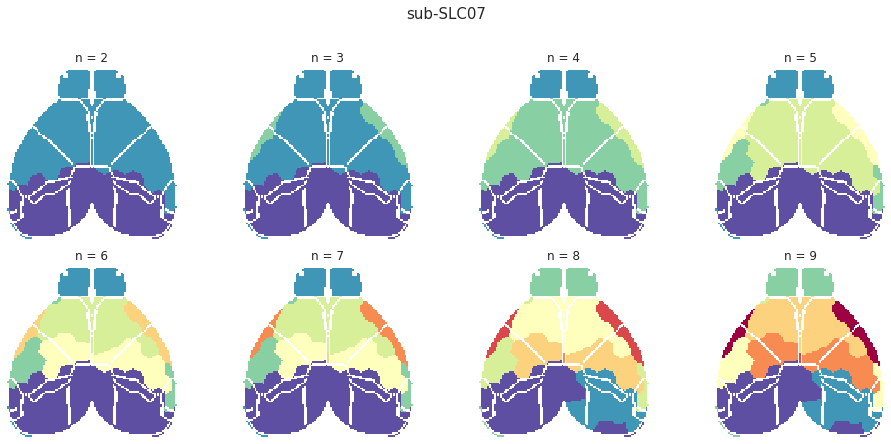

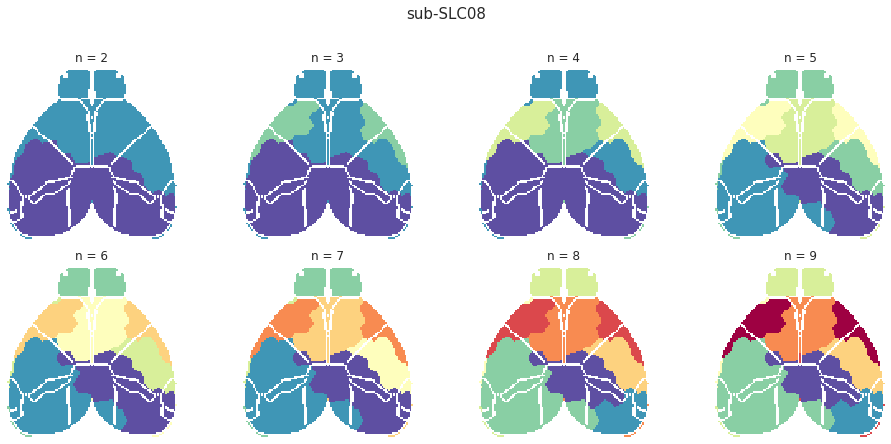

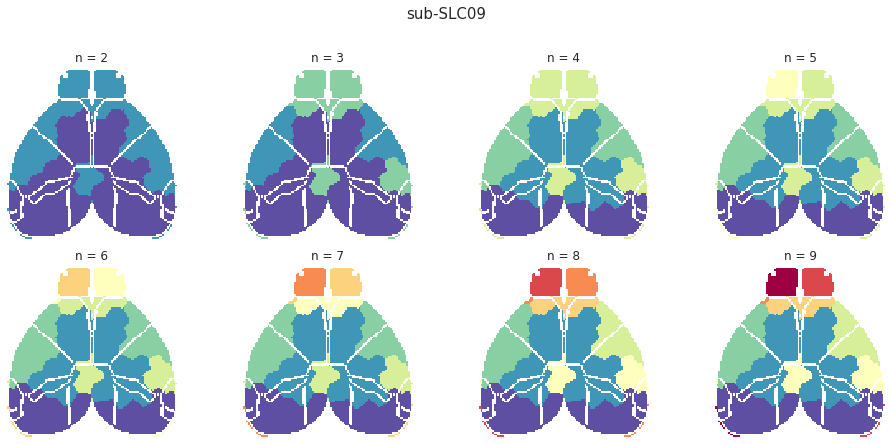

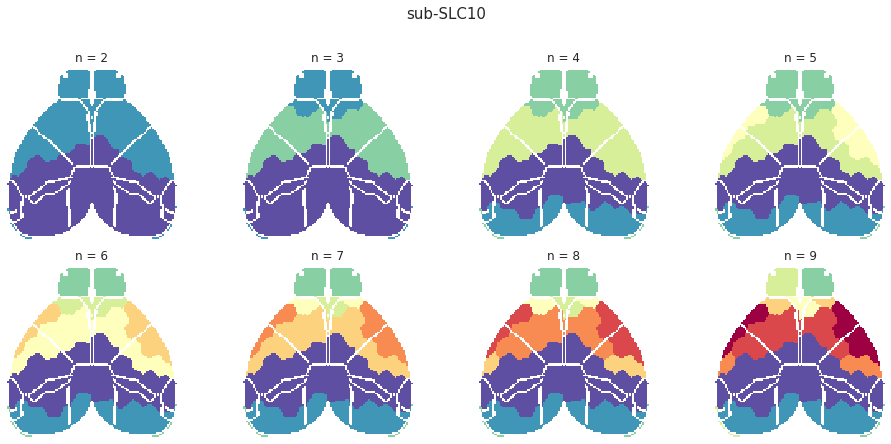

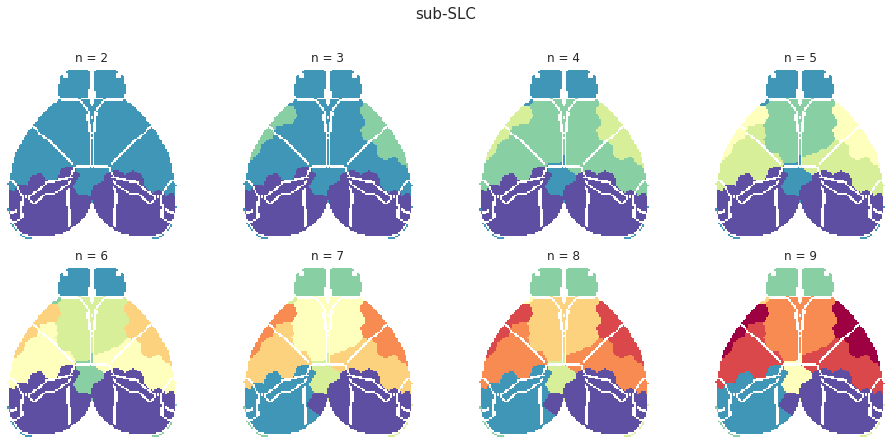

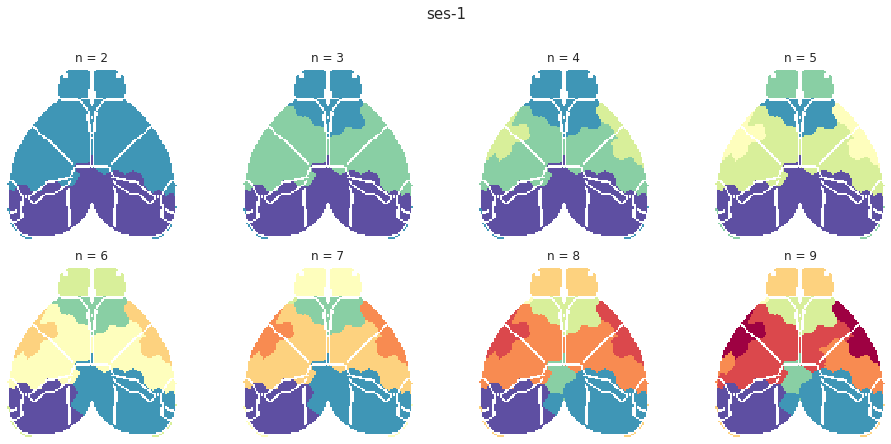

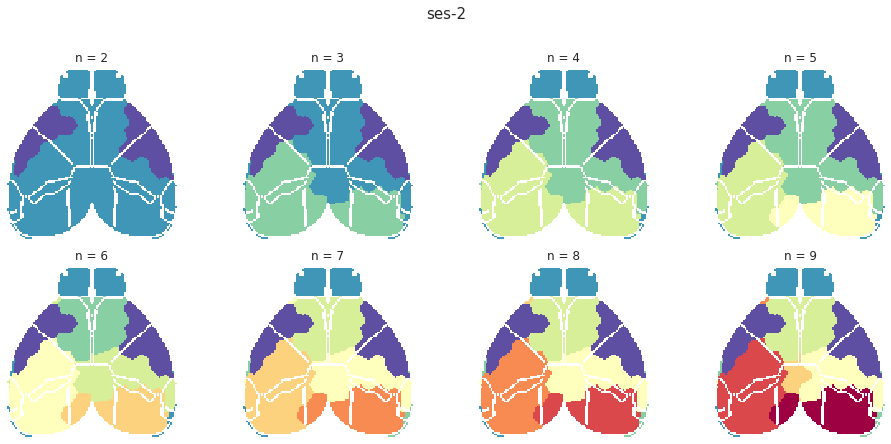

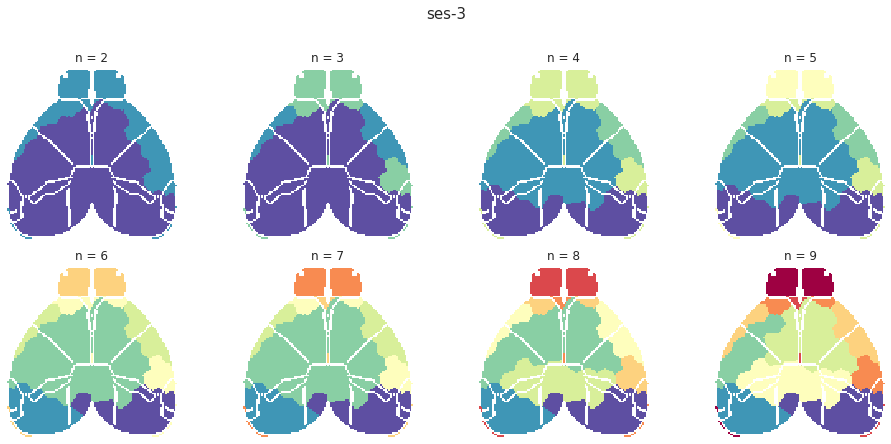

In [11]:
n_clusters = range(2, 10)
nrows = 2
ncols = int(np.ceil(len(n_clusters) / nrows))
metric = 'correlation'

hierarchical = {}
for key, df in tqdm(mice.bold_combined.items()):
    _hier = Hierarchical(
        df=df,
        parcel=mice.parcel,
        metric=metric,
    ).fit(n_clusters)
    hierarchical[key] = _hier

    fig, axes = create_figure(nrows, ncols, figsize=(13.5, 6))
    for ax_i, n in enumerate(n_clusters):
        i, j = ax_i//ncols, ax_i%ncols
        cluster = _hier.results[n]['cluster']
        cluster_masks = {i: cluster.x == i for i in cluster.idxs}
        coord2c = project_masks_2d(cluster_masks, mice.allen)[0]

        npix_x, npix_y, npix_z = mice.allen['template_info']['sizes']
        clusters2d = np.zeros((npix_x, npix_z))
        for pix, c in coord2c.items():
            clusters2d[pix] = c
        clusters2d = clusters2d.astype('uint8')

        _contour, _x = filter_boundaries(
            x_list=[mice.parcel.results2d['contour'], clusters2d],
            mask=clusters2d.astype(bool),
        )
        cond = np.logical_or(_contour, _x == 0)
        data2plt = np.ma.masked_where(cond, _x)
        axes[i, j].imshow(data2plt, cmap='Spectral_r', vmin=1, vmax=max(n_clusters))
        axes[i, j].set_title(f"n = {len(cluster.idxs)}")
        remove_ticks(axes[i, j])
    fig.suptitle(key, fontsize=15, y=1.02)
    plt.show()
    print('\n\n')

In [13]:
list(hierarchical.keys())

[
    'sub-SLC01_ses-1',
    'sub-SLC01_ses-2',
    'sub-SLC01_ses-3',
    'sub-SLC02_ses-1',
    'sub-SLC02_ses-2',
    'sub-SLC02_ses-3',
    'sub-SLC03_ses-1',
    'sub-SLC03_ses-2',
    'sub-SLC03_ses-3',
    'sub-SLC04_ses-1',
    'sub-SLC04_ses-2',
    'sub-SLC04_ses-3',
    'sub-SLC05_ses-1',
    'sub-SLC05_ses-2',
    'sub-SLC05_ses-3',
    'sub-SLC06_ses-1',
    'sub-SLC06_ses-2',
    'sub-SLC06_ses-3',
    'sub-SLC07_ses-1',
    'sub-SLC07_ses-2',
    'sub-SLC07_ses-3',
    'sub-SLC08_ses-1',
    'sub-SLC08_ses-2',
    'sub-SLC08_ses-3',
    'sub-SLC09_ses-1',
    'sub-SLC09_ses-2',
    'sub-SLC09_ses-3',
    'sub-SLC10_ses-1',
    'sub-SLC10_ses-2',
    'sub-SLC10_ses-3',
    'sub-SLC01',
    'sub-SLC02',
    'sub-SLC03',
    'sub-SLC04',
    'sub-SLC05',
    'sub-SLC06',
    'sub-SLC07',
    'sub-SLC08',
    'sub-SLC09',
    'sub-SLC10',
    'sub-SLC',
    'ses-1',
    'ses-2',
    'ses-3'
]

In [153]:
from register.atlas import project_masks_2d
mice = Mice(Config(64))
mice.combine_dfs('rest')

In [154]:
def dice_score(m1, m2):
    return 2.0 * np.logical_and(m1, m2).sum() / (np.sum(m1) + np.sum(m2))

def overlap_score(m1, m2):
    return np.logical_and(m1 == 1, m2 == 1).sum() / min(np.sum(m1), np.sum(m2))

  0%|          | 0/44 [00:00<?, ?it/s]

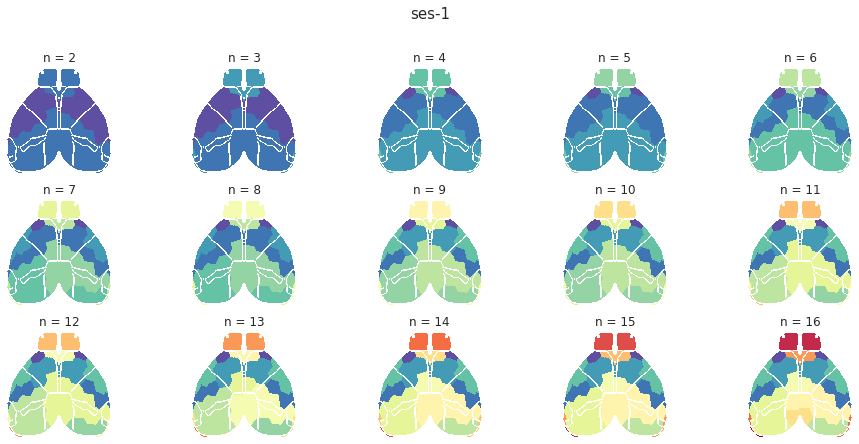

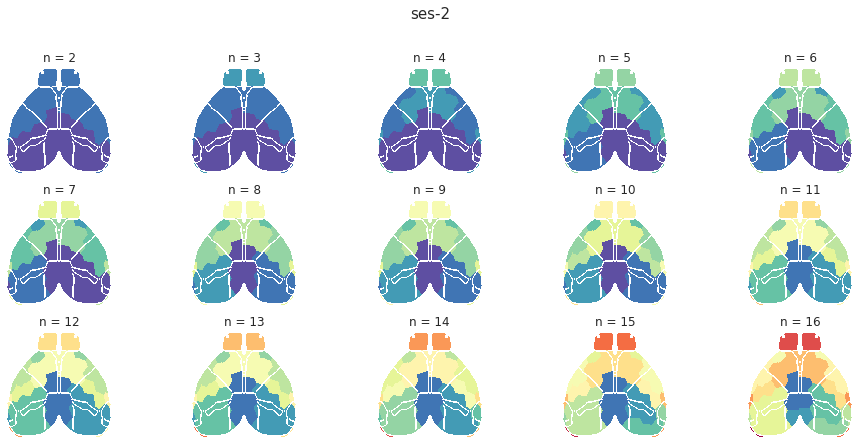

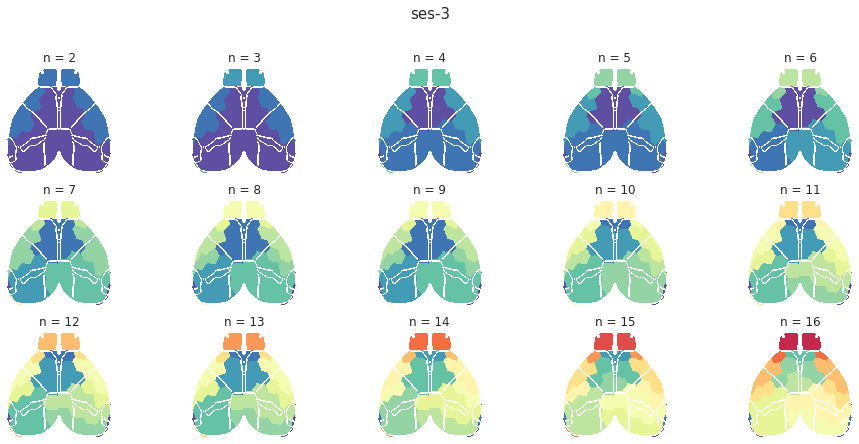

In [155]:
selected_keys = ['ses-1', 'ses-2', 'ses-3']
n_clusters = range(2, 17)
nrows = 3
ncols = int(np.ceil(len(n_clusters) / nrows))
metric = 'correlation'

hierarchical = {}
for key, df in tqdm(mice.bold_combined.items()):
    if key not in selected_keys:
        continue
    _hier = Hierarchical(
        df=df,
        parcel=mice.parcel,
        metric=metric,
    ).fit(n_clusters)
    hierarchical[key] = _hier

    fig, axes = create_figure(nrows, ncols, figsize=(13.5, 6))
    for ax_i, n in enumerate(n_clusters):
        i, j = ax_i//ncols, ax_i%ncols
        cluster = _hier.results[n]['cluster']
        cluster_masks = {i: cluster.x == i for i in cluster.idxs}
        coord2c = project_masks_2d(cluster_masks, mice.allen)[0]

        npix_x, npix_y, npix_z = mice.allen['template_info']['sizes']
        clusters2d = np.zeros((npix_x, npix_z))
        for pix, c in coord2c.items():
            clusters2d[pix] = c
        clusters2d = clusters2d.astype('uint8')

        _contour, _x = filter_boundaries(
            x_list=[mice.parcel.results2d['contour'], clusters2d],
            mask=clusters2d.astype(bool),
        )
        cond = np.logical_or(_contour, _x == 0)
        data2plt = np.ma.masked_where(cond, _x)
        axes[i, j].imshow(data2plt, cmap='Spectral_r', vmin=1, vmax=max(n_clusters))
        axes[i, j].set_title(f"n = {len(cluster.idxs)}")
        remove_ticks(axes[i, j])
    fig.suptitle(key, fontsize=15, y=1.02)
    plt.show()
    print('\n\n')

In [156]:
def find_best_match(scores, reverese: bool = True):
    ind = np.argsort(scores.ravel())
    ind_x, ind_y = np.unravel_index(
        indices=ind[::-1] if reverese else ind,
        shape=scores.shape,
    )
    ctr = 0
    _i, _j = [], []
    while True:
        if ind_x[ctr] not in _i and ind_y[ctr] not in _j:
            _i.append(ind_x[ctr])
            _j.append(ind_y[ctr])
        ctr += 1
        cond = list(set(_i)) == list(range(n)) and list(set(_i)) == list(range(n))
        cond_safety = ctr >= len(scores.ravel())
        if cond or cond_safety:
            break

    mapping = {i: j for i, j in zip(_i, _j)}
    mapping = dict(sorted(mapping.items()))
    return mapping

In [157]:
avg_scores = {}
dict_list = []
for n in tqdm(n_clusters):
    masks = {}
    for key in selected_keys:
        hier = hierarchical[key]
        cluster = hier.results[n]['cluster']
        cluster_masks = {i: cluster.x == i for i in cluster.idxs}
        masks[key] = list(cluster_masks.values())

    for k1, k2 in itertools.combinations(selected_keys, 2):
        dice = np.zeros((len(masks[k1]), len(masks[k2])))
        overlap = np.zeros((len(masks[k1]), len(masks[k2])))
        jaccard = np.zeros((len(masks[k1]), len(masks[k2])))
        for i, m1 in enumerate(masks[k1]):
            for j, m2 in enumerate(masks[k2]):
                dice[i, j] = dice_score(m1, m2)
                overlap[i, j] = overlap_score(m1, m2)
                jaccard[i, j] = 1 - sp_dist.jaccard(m1.flatten(), m2.flatten())
        results = {
            'dice': dice,
            'overlap': overlap,
            'jaccard': jaccard,
        }
        mappings = {
            k: find_best_match(v)
            for k, v in results.items()
        }
        results = {
            k: v[:, list(mappings[k].values())]
            for k, v in results.items()
        }
        for k, v in results.items():
            data_dict = {
                'n_rois': [hier.parcel['n_cortical_regions']] * n,
                'n_clusters': [n] * n,
                'condition': ['_'.join([k1, k2])] * n,
                'metric': [metric] * n,
                'dist_measure': [k] * n,
                'value': [1 - x for x in np.diag(v)],
            }
            dict_list.append(data_dict)

        # fig, axes = create_figure(1, 3, figsize=(8, 3))
        # for ax, (k, v) in zip(axes, results.items()):
        #     im = ax.imshow(v, cmap='nipy_spectral')
        #     plt.colorbar(im, ax=ax, shrink=0.6)
        #     ax.set_title(f"cond: {'_'.join([k1, k2])}\n{k}, mean: {np.round(np.diag(v).mean(), 3)}")
        # fig.suptitle(n, fontsize=12)
        # plt.show()
        # print('\n\n')

results_df = pd.DataFrame(merge_dicts(dict_list))

  0%|          | 0/15 [00:00<?, ?it/s]

...merging dicts: 0it [00:00, ?it/s]

In [128]:
results_df.columns

Index(['n_rois', 'n_clusters', 'condition', 'metric', 'dist_measure', 'value'], dtype='object')

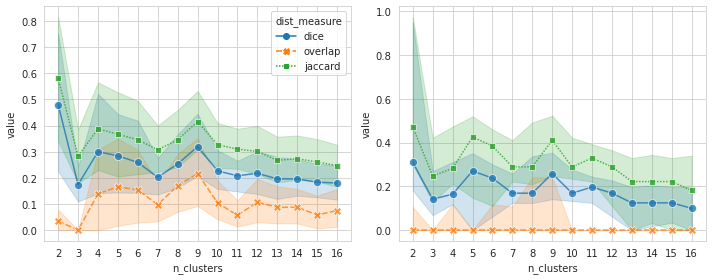

In [158]:
fig, axes = create_figure(1, 2, (10, 4), style='whitegrid')

selected_df = results_df.loc[results_df.metric == 'correlation']
sns.lineplot(
    data=selected_df,
    x='n_clusters',
    y='value',
    hue='dist_measure',
    style='dist_measure',
    markers=True,
    markersize=8,
    estimator=np.mean,
    alpha=0.8,
    ax=axes[0],
)
sns.lineplot(
    data=selected_df,
    x='n_clusters',
    y='value',
    hue='dist_measure',
    style='dist_measure',
    markers=True,
    markersize=8,
    estimator=np.median,
    legend=False,
    alpha=0.8,
    ax=axes[1],
)
for ax in axes:
    ax.set_xticks(n_clusters)

plt.show()

## Canberra?

In [159]:
from register.atlas import project_masks_2d
mice.combine_dfs('rest')

In [160]:
def dice_score(m1, m2):
    return 2.0 * np.logical_and(m1, m2).sum() / (np.sum(m1) + np.sum(m2))

def overlap_score(m1, m2):
    return np.logical_and(m1 == 1, m2 == 1).sum() / min(np.sum(m1), np.sum(m2))

  0%|          | 0/44 [00:00<?, ?it/s]

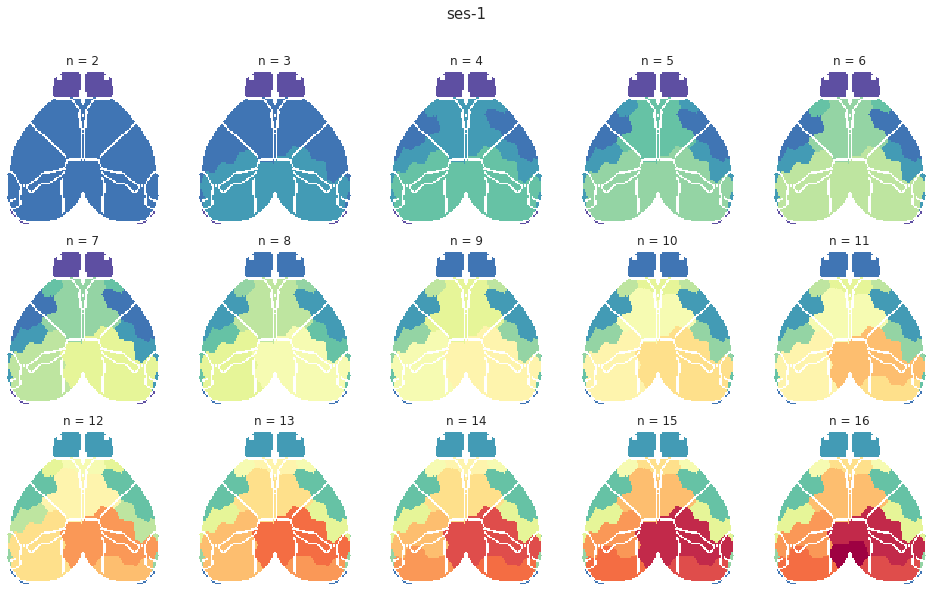

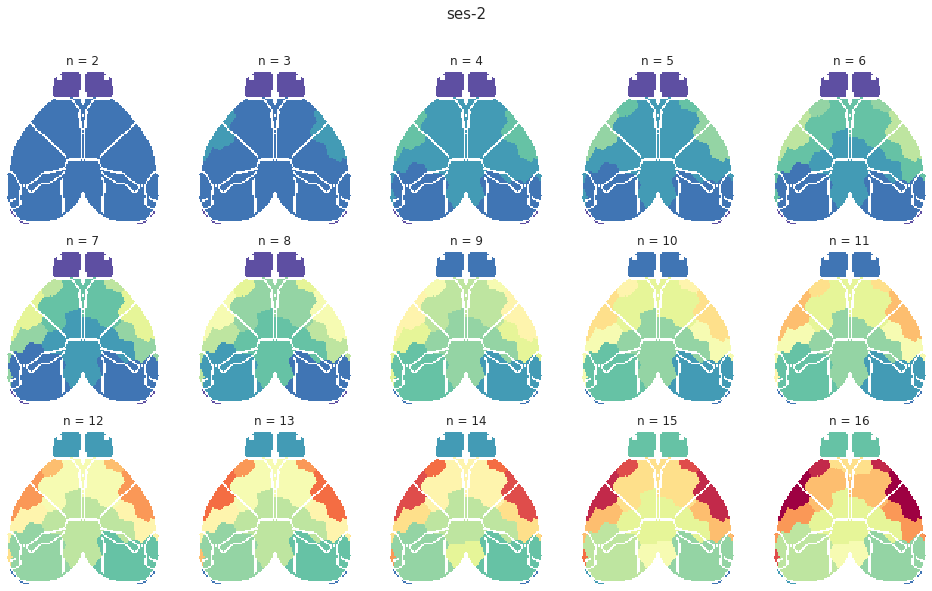

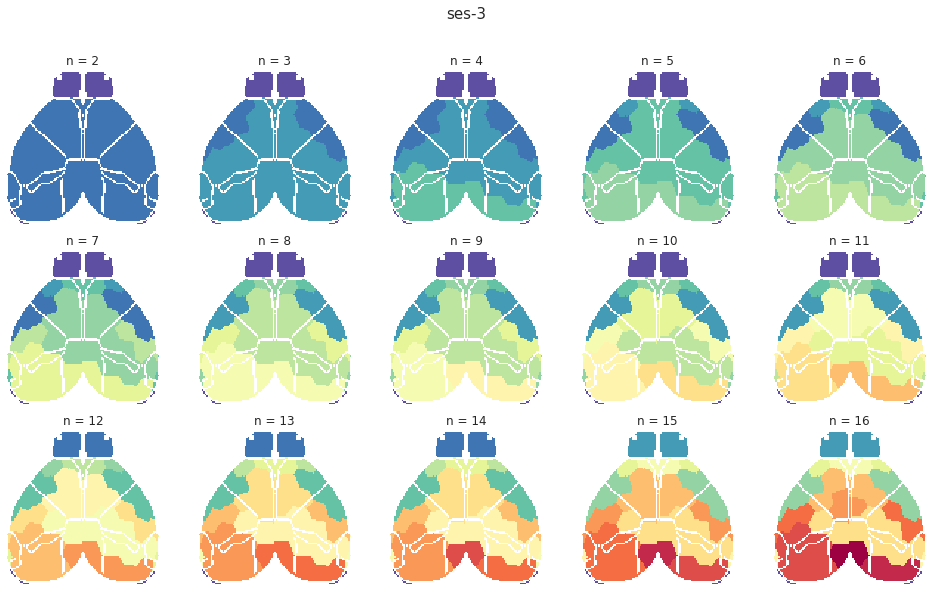

In [161]:
selected_keys = ['ses-1', 'ses-2', 'ses-3']
n_clusters = range(2, 17)
nrows = 3
ncols = int(np.ceil(len(n_clusters) / nrows))
metric = 'canberra'

hierarchical = {}
for key, df in tqdm(mice.bold_combined.items()):
    if key not in selected_keys:
        continue
    _hier = Hierarchical(
        df=df,
        parcel=mice.parcel,
        metric=metric,
    ).fit(n_clusters)
    hierarchical[key] = _hier

    fig, axes = create_figure(nrows, ncols, figsize=(13.5, 8))
    for ax_i, n in enumerate(n_clusters):
        i, j = ax_i//ncols, ax_i%ncols
        cluster = _hier.results[n]['cluster']
        cluster_masks = {i: cluster.x == i for i in cluster.idxs}
        coord2c = project_masks_2d(cluster_masks, mice.allen)[0]

        npix_x, npix_y, npix_z = mice.allen['template_info']['sizes']
        clusters2d = np.zeros((npix_x, npix_z))
        for pix, c in coord2c.items():
            clusters2d[pix] = c
        clusters2d = clusters2d.astype('uint8')

        _contour, _x = filter_boundaries(
            x_list=[mice.parcel.results2d['contour'], clusters2d],
            mask=clusters2d.astype(bool),
        )
        cond = np.logical_or(_contour, _x == 0)
        data2plt = np.ma.masked_where(cond, _x)
        axes[i, j].imshow(data2plt, cmap='Spectral_r', vmin=1, vmax=max(n_clusters))
        axes[i, j].set_title(f"n = {len(cluster.idxs)}")
        remove_ticks(axes[i, j])
    fig.suptitle(key, fontsize=15, y=1.02)
    plt.show()
    print('\n\n')

In [162]:
def find_best_match(scores, reverese: bool = True):
    ind = np.argsort(scores.ravel())
    ind_x, ind_y = np.unravel_index(
        indices=ind[::-1] if reverese else ind,
        shape=scores.shape,
    )
    ctr = 0
    _i, _j = [], []
    while True:
        if ind_x[ctr] not in _i and ind_y[ctr] not in _j:
            _i.append(ind_x[ctr])
            _j.append(ind_y[ctr])
        ctr += 1
        cond = list(set(_i)) == list(range(n)) and list(set(_i)) == list(range(n))
        cond_safety = ctr >= len(scores.ravel())
        if cond or cond_safety:
            break

    mapping = {i: j for i, j in zip(_i, _j)}
    mapping = dict(sorted(mapping.items()))
    return mapping

In [163]:
avg_scores = {}
dict_list = []
for n in tqdm(n_clusters):
    masks = {}
    for key in selected_keys:
        hier = hierarchical[key]
        cluster = hier.results[n]['cluster']
        cluster_masks = {i: cluster.x == i for i in cluster.idxs}
        masks[key] = list(cluster_masks.values())

    for k1, k2 in itertools.combinations(selected_keys, 2):
        dice = np.zeros((len(masks[k1]), len(masks[k2])))
        overlap = np.zeros((len(masks[k1]), len(masks[k2])))
        jaccard = np.zeros((len(masks[k1]), len(masks[k2])))
        for i, m1 in enumerate(masks[k1]):
            for j, m2 in enumerate(masks[k2]):
                dice[i, j] = dice_score(m1, m2)
                overlap[i, j] = overlap_score(m1, m2)
                jaccard[i, j] = 1 - sp_dist.jaccard(m1.flatten(), m2.flatten())
        results = {
            'dice': dice,
            'overlap': overlap,
            'jaccard': jaccard,
        }
        mappings = {
            k: find_best_match(v)
            for k, v in results.items()
        }
        results = {
            k: v[:, list(mappings[k].values())]
            for k, v in results.items()
        }
        for k, v in results.items():
            data_dict = {
                'n_rois': [hier.parcel['n_cortical_regions']] * n,
                'n_clusters': [n] * n,
                'condition': ['_'.join([k1, k2])] * n,
                'metric': [metric] * n,
                'dist_measure': [k] * n,
                'value': [1 - x for x in np.diag(v)],
            }
            dict_list.append(data_dict)

        # fig, axes = create_figure(1, 3, figsize=(8, 3))
        # for ax, (k, v) in zip(axes, results.items()):
        #     im = ax.imshow(v, cmap='nipy_spectral')
        #     plt.colorbar(im, ax=ax, shrink=0.6)
        #     ax.set_title(f"cond: {'_'.join([k1, k2])}\n{k}, mean: {np.round(np.diag(v).mean(), 3)}")
        # fig.suptitle(n, fontsize=12)
        # plt.show()
        # print('\n\n')

results_df2 = pd.DataFrame(merge_dicts(dict_list))

  0%|          | 0/15 [00:00<?, ?it/s]

...merging dicts: 0it [00:00, ?it/s]

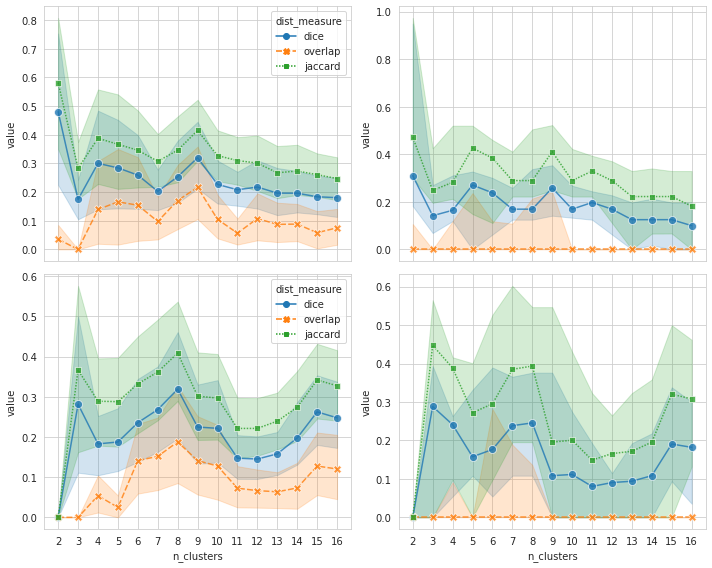

In [164]:
fig, axes = create_figure(2, 2, (10, 8), style='whitegrid', sharex='all')

for i in range(2):
    #selected_df = results_df.loc[results_df.metric == 'correlation']
    selected_df = results_df if i == 0 else results_df2
    sns.lineplot(
        data=selected_df,
        x='n_clusters',
        y='value',
        hue='dist_measure',
        style='dist_measure',
        markers=True,
        markersize=8,
        estimator=np.mean,
        alpha=0.8,
        ax=axes[i, 0],
    )
    sns.lineplot(
        data=selected_df,
        x='n_clusters',
        y='value',
        hue='dist_measure',
        style='dist_measure',
        markers=True,
        markersize=8,
        estimator=np.median,
        legend=False,
        alpha=0.8,
        ax=axes[i, 1],
    )
for ax in axes.flatten():
    ax.set_xticks(n_clusters)

plt.show()

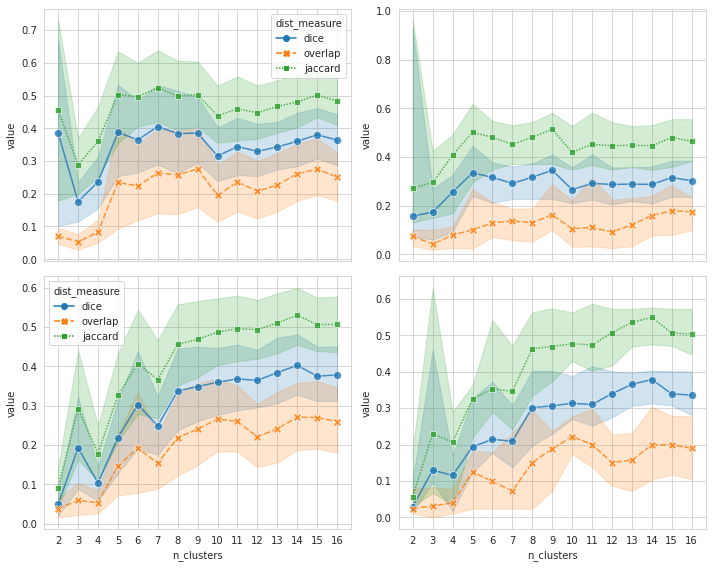

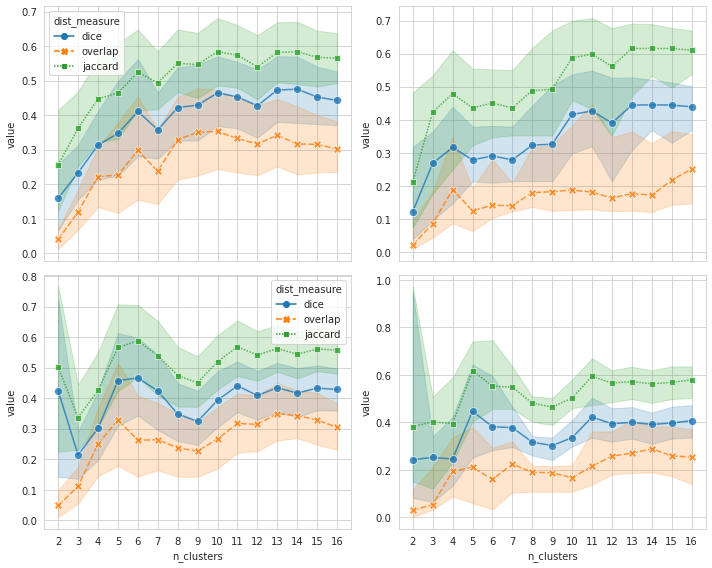

## Report properties of a parcellation (TODO)
> use this:
```Python
import pyinspect as pi
```

In [ ]:
    def content(self):
        """
        Prints an overview of the Actors in the scene.
        """

        actors = pi.Report(
            "Scene actors", accent=salmon, dim=orange, color=orange
        )

        for act in self.actors:
            actors.add(
                f"[bold][{amber}]- {act.name}[/bold][{orange_darker}] "
                f"(type: [{orange}]{act.br_class}[/{orange}]) "
                f"(color: [{orange}]{rgb2hex(act.mesh.c())}[/{orange}]) "
                f"(alpha: [{orange}]{act.mesh.alpha()}[/{orange}]) "
            )

        if "win32" != sys.platform:
            actors.print()
        else:
            print(pi.utils.stringify(actors, maxlen=-1))

## Gozzi data

In [13]:
import ants

In [278]:
file = '/home/hadi/Downloads/ica_all_05_icasso_iter_1000_comp_0_mask_z_1_allen_masked_sym_thresh.nrrd'
img = ants.image_read(file)
img

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (1.0, 1.0, 1.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

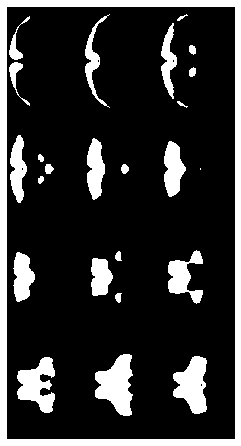

In [279]:
img.plot(axis=0)

In [280]:
file = '/home/hadi/Downloads/ica_all_05_icasso_iter_1000_comp_0_mask_z_1_allen_masked_sym_thresh.nii.gz'
img = ants.image_read(file)
img

ANTsImage (RPI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (114, 80, 132)
         Spacing    : (1.0, 1.0, 1.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

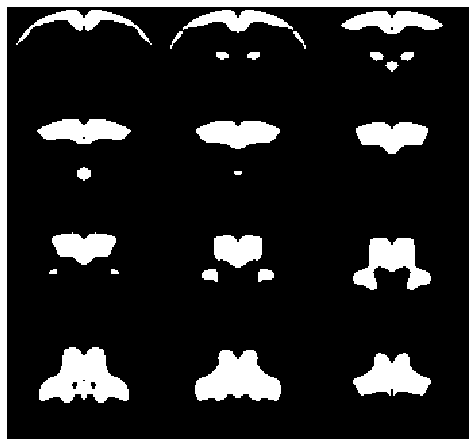

In [281]:
img.plot(axis=2)